# TMA4215: Numerical Mathematics - Autumn 2023 
## Project 1: The discrete Fourier Transform, Signal Processing and Image Processing

### Introduction

In an era dominated by digital data, the omnipresence of signals and images in various domains, such as social media, healthcare and finance, has necessitated the development of more efficient processing techniques to extract only the most important information from signals and images without any perceivable loss of information. The most important and widely used processing technique is built on the framework of the Fourier Transform and the Discrete, as well as Fast Fourier Transforms. 

In this project, we are going on journey from proving and deriving the Discrete Fourier Transform to using it to process signals and images with different filters. 

In [1]:
#useful libraries for the programming part of this project
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import imageio 

### Task 1: The discrete Fourier Transform

Given that the interval $\mathbb{T}$ is given as $\mathbb{T} \equiv [0,1)$, the inner product of two functions $f,g \in L^2(\mathbb{T})$, where 
$$
L^2(\mathbb{T}) := \bigg\{f: \mathbb{T} \rightarrow \mathbb{R} \vert \int_{0}^{1}|f(x)|^2 \text{d}x < \infty\bigg\},
$$
is defined by
$$
\langle f, g \rangle = \int_{0}^{1}f(x)\overline{g(x)}\text{d}x
$$

**a)** Now, consider the functions $e^{2\pi ikx}, k \in \mathbb{Z}, x \in \mathbb{R}$. It is claimed that 
$$
\langle e^{2\pi ik \cdot}, e^{2\pi ih \cdot} \rangle = \begin{equation}
    \begin{cases}
        1 & \text{if $k = h$}.\\
        0 & \text{else}
    \end{cases}
\end{equation}
$$

Without further ado, lets prove the claim.

$$
\langle e^{2\pi ikx}, e^{2\pi ihx} \rangle = \int_{0}^{1}e^{2\pi ikx}\overline{e^{2\pi ihx}}\text{d}x \\
= \int_{0}^{1}e^{2\pi ikx}e^{-2\pi ihx}\text{d}x \\
= \int_{0}^{1}e^{2\pi ix(k-h)}\text{d}x
$$

Assume $k=h$:
$$
\langle e^{2\pi ikx}, e^{2\pi ihx} \rangle = \int_{0}^{1}e^{2\pi ix(k-h)}\text{d}x \\
= \int_{0}^{1}1\text{d}x \\
= 1 - 0 \\ = 1 
$$

Now, assume $k \neq h$: 
$$
\langle e^{2\pi ikx}, e^{2\pi ihx} \rangle = \int_{0}^{1}e^{2\pi ix(k-h)}\text{d}x
$$

Using Euler's formula,
$$
e^{i \theta} = \text{cos}(\theta) + i\text{sin}(\theta)
$$
we get 
$$
\langle e^{2\pi ikx}, e^{2\pi ihx} \rangle = \int_{0}^{1} \bigg[\text{cos}(2\pi(k-h)x) + i\text{sin}(2\pi(k-h)x)\bigg] \\
= \frac{1}{2\pi(k-h)}\bigg[\text{sin}\bigg(2\pi(k-h)x\bigg) - i\text{cos}\bigg(2\pi(k-h)x\bigg)\bigg],
$$
and since both $k,h \in \mathbb{Z}$, such that $\text{sin}\bigg(2\pi(k-h)\bigg) = \text{sin}(2\pi)= 0$, as well as $\text{cos}\bigg(2\pi(k-h)\bigg) = \text{cos}(2\pi)= 1$

We therefore get 
$$
\langle e^{2\pi ikx}, e^{2\pi ihx} \rangle = \int_{0}^{1} \bigg[\text{cos}(2\pi(k-h)x) + i\text{sin}(2\pi(k-h)x)\bigg] \\
= \frac{1}{2\pi(k-h)}\bigg[\text{sin}\bigg(2\pi(k-h)x\bigg) - i\text{cos}\bigg(2\pi(k-h)x\bigg)\bigg] = \frac{1}{2\pi(k-h)}(i-i) = 0
$$
for $k\neq h$.

$$ 
\Rightarrow \langle e^{2\pi ik \cdot}, e^{2\pi ih \cdot} \rangle = \begin{equation}
    \begin{cases}
        1 & \text{if $k = h$}.\\
        0 & \text{else}
    \end{cases}
\end{equation}
$$

**b)** We consider the functions of the form $\sqrt{2}\text{sin}(2\pi mx), m = 1,2,...,\text{cos}(2\pi 0x)$ and $\sqrt{2}\text{cos}(2\pi nx), n = 1,2,...,x \in \mathbb{T}$. Prove that for these functions form an orthonormal system, i.e. we have

$$ 
\begin{equation}
i) \; \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = 0 \; m \in {0,1,...} \\
ii) \; \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{sin}(2\pi m \cdot) \rangle = 
\begin{cases}
        0 & \text{if $m \neq n$}\\
        1 & \text{if $m = n$}
    \end{cases}
    \; m, n \in{1,2,...}\\
iii) \; \langle \sqrt{2} \text{cos}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = 
\begin{cases}
        0 & \text{if $m \neq n$}\\
        1 & \text{if $m = n \neq 0$} \\
        2 & \text{if $m = n = 0$}
    \end{cases}
    \; m, n \in{1,2,...}
\end{equation}
$$

$i)$ 
$$
\begin{equation}
 \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = \\
= \int_0^1 \sqrt{2} \text{sin}(2\pi n x) \cdot \sqrt{2} \text{cos}(2\pi m x)\text{d}x \\
\end{equation}
$$

Using trigonomteric identities, we can simplify the integral above to 
$$
\begin{equation}
 \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = \\
= 2 \int_0^1 \text{sin}\bigg(2\pi (n+m) x\bigg) + \text{sin}\bigg(2\pi (n+m) x\bigg)\text{d}x =\\
= -\frac{1}{2\pi(n+m)} \text{cos}\bigg(2\pi(n+m)x\bigg)\bigg\vert_0^1 -\frac{1}{2\pi(n-m)} \text{cos}\bigg(2\pi(n-m)x\bigg)\bigg\vert_0^1 = \\
= -\frac{1}{2\pi(n+m)} \bigg[\text{cos}\bigg(2\pi(n+m)\bigg)-1\bigg] -\frac{1}{2\pi(n-m)} \bigg[\text{cos}\bigg(2\pi(n-m)\bigg)-1\bigg],
\end{equation}
$$
and since cosine-functions are $2\pi$-periodic, we get that $\text{cos}\bigg(2\pi(m+n)\bigg)=\text{cos}(2\pi)=1, \text{for} \; m,n \in \mathbb{Z}$.

$$
\begin{equation}
 \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = \\
 = -\frac{1}{2\pi(n+m)} \bigg[\text{cos}\bigg(2\pi(n+m)\bigg)-1\bigg] -\frac{1}{2\pi(n-m)} \bigg[\text{cos}\bigg(2\pi(n-m)\bigg)-1\bigg] = \\
 = -\frac{1}{2\pi(n+m)}(1-1) - \frac{1}{2\pi(n+m)}(1-1) = 0 \square
\end{equation}
$$

$ii)$
$$
\begin{equation}
\; \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{sin}(2\pi m \cdot) \rangle = \\
= 2\int_0^1 \text{sin}(2\pi n x) \cdot \text{sin}(2\pi m x)\text{d}x =  \\
= \int_0^1 \text{cos}\bigg(2\pi (n-m) x\bigg) - \text{cos}\bigg(2\pi (n+m) x\bigg)\text{d}x
\end{equation}
$$

Now, consider $n=m$:
$$
\begin{equation}
\; \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{sin}(2\pi m \cdot) \rangle = \\
= \int_0^1 \text{cos}\bigg(2\pi (n-m) x\bigg) - \text{cos}\bigg(2\pi (n+m) x\bigg)\text{d}x = \\
= \int_0^1 1- \text{cos}(4\pi nx)\text{d}x,
\end{equation}
$$
and with $\text{cos}(4\pi nx)$ being symmetric, we get 
$$
\begin{equation}
\; \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{sin}(2\pi m \cdot) \rangle = \\
= \int_0^1 1- \text{cos}(4\pi nx)\text{d}x = \\
= \int_0^1 \text{d}x = 1 \; \text{for} \; m = n
\end{equation}
$$

For $m \neq n$, we get
$$
\begin{equation}
\; \langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{sin}(2\pi m \cdot) \rangle = \\
= \int_0^1 \text{cos}\bigg(2\pi (n-m) x\bigg) - \text{cos}\bigg(2\pi (n+m) x\bigg)\text{d}x = \\
= \frac{1}{2\pi(n-m)} \text{sin}\bigg(2\pi(n-m)x\bigg)\bigg\vert_0^1 -\frac{1}{2\pi(n+m)} \text{sin}\bigg(2\pi(n+m)x\bigg)\bigg\vert_0^1
\end{equation}
$$

Since sine-functions are $2\pi$-periodic, $\text{sin}\bigg(2\pi(n-m)\bigg) = \text{sin}(2\pi) = 0$, as well as  $\text{sin}\bigg(2\pi(n+m)\bigg) = \text{sin}(2\pi) = 0$, for $m,n \in \{\mathbb{Z}, m,n \geq 1\}$, so that 
$$
\begin{equation}
\langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{sin}(2\pi m \cdot) \rangle = 0,
\end{equation}
$$
for $m \neq n$, proving that  
$$
\begin{equation}
\langle \sqrt{2} \text{sin}(2\pi n \cdot), \sqrt{2} \text{sin}(2\pi m \cdot) \rangle = 
\begin{cases}
        0 & \text{if $m \neq n$}\\
        1 & \text{if $m = n$}
    \end{cases}
    \; m, n \in{1,2,...}
\end{equation}
$$

$iii)$
$$
\begin{equation}
\langle \sqrt{2} \text{cos}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = \\
= 2\int_0^1 \text{cos}(2\pi n x) \cdot \text{cos}(2\pi m x)\text{d}x =  \\
= \int_0^1 \text{cos}\bigg(2\pi (n-m) x\bigg) + \text{cos}\bigg(2\pi (n+m) x\bigg)\text{d}x
\end{equation}
$$

Now, consider $m=n=0$:
$$
\begin{equation}
\langle \sqrt{2} \text{cos}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = \\
= \int_0^1 \text{cos}(4\pi x) + \text{cos}(0)\text{d}x = \\
= \int_0^1 (1 + 1)\text{d}x = \\
= 2
\end{equation}
$$

Lets consider the second case where $m=n\neq0$: 
$$
\begin{equation}
\langle \sqrt{2} \text{cos}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = \\
= \int_0^1 \text{cos}(0) + \text{cos}(4n\pi x)\text{d}x = \\
= 1
\end{equation}
$$

And lastly, lets consider the inner product when $m\neq n$:
$$
\begin{equation}
\langle \sqrt{2} \text{cos}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = \\
= \int_0^1 \text{cos}\bigg(2\pi (n-m) x\bigg) + \text{cos}\bigg(2\pi (n+m) x\bigg)\text{d}x = 0,
\end{equation}
$$
where I have used the result from $ii)$. This proves the last claim, where 
$$
\; \langle \sqrt{2} \text{cos}(2\pi n \cdot), \sqrt{2} \text{cos}(2\pi m \cdot) \rangle = 
\begin{cases}
        0 & \text{if $m \neq n$}\\
        1 & \text{if $m = n \neq 0$} \\
        2 & \text{if $m = n = 0$}
    \end{cases}
    \; m, n \in{1,2,...}.
$$

Furthermore, we have proven that these functions form an orthonormal system. This result will be useful in later parts of the project. 

**c)** Lets start by finding an orthogonal basis for $T_n$. The latter is defined as
$$
\begin{equation}
T:= \text{span} \bigg \{e^{-2\pi in\cdot}, ...,e^{2\pi in\cdot} \bigg \} =\\  
= \text{span} \bigg \{e^{-2\pi ih\cdot},e^{2\pi ik\cdot} \bigg \}, \; h,k \in \mathbb{Z}
\end{equation}
$$

From a), we know that the inner product space
$$
\langle e^{2\pi ik \cdot}, e^{2\pi ih \cdot} \rangle = \begin{equation}
    \begin{cases}
        1 & \text{if $k = h$}.\\
        0 & \text{else}
    \end{cases}
\end{equation}
$$
meaning that $T$ is orthogonal. 

Furthermore,
$$
\lVert f_k(\cdot) \rVert = \lVert \langle e^{2\pi ik \cdot}, e^{2\pi ih \cdot} \rangle \rVert = 1,
$$
and defining 
$$
\alpha_k = \frac{f_k(\cdot}{\lVert f_k(\cdot) \rVert} = f_k(\cdot),
$$
gives us an orthonormal basis for T.

Now, recall $S_n$. It is defined as
$$
\begin{equation}
S := span\bigg \{\text{cos}(0), ..., \text{cos}(2\pi n \cdot), \text{sin}(2 \pi), ... \text{sin}(2\pi n \cdot) \bigg \}.
\end{equation}
$$

Consider now
$$
\begin{equation}
s_k = \begin{cases}
        \text{cos}(2 \pi k \cdot) & 0 \geq k \geq n, k \in \mathbb{N} \\
        \text{sin}(2 \pi (k-n) \cdot) & n < k \geq 2n, k \in \mathbb{N},
    \end{cases}
\end{equation}
$$

where $s_k$ is a general function that describes each element in $S$. Using the results from b), we can see that $s_k$ reperesents each element for the different cases in b). This means that $S$ too is orthogonal. However, $s_k$ is not orthonormal, as to achieve orthonormality as shown in b), we need to multiply $s_k$ with $\sqrt{2}$. 

$$
\begin{equation}
\Rightarrow \lVert s_k \rVert = \frac{1}{\sqrt{2}},
\end{equation}
$$

such that 

$$
\begin{equation}
\beta_k = \frac{s_k}{\lVert s_k \rVert} = \sqrt{2}s_k = \sqrt{2}f_k(\cdot).
\end{equation}
$$

An orthonormal basis to $S_n$ is therefore described by $\{\beta_k\}_{k=0}^{2n+1}$, where $\beta_0 = 1$ and $\beta_i =\sqrt{2}s_i \; \text{for} \; i \geq 1$ 

Now, lets prove that $T_n = S_n$. Using Euler's identity on $T_n$, we find that 
$$
\begin{equation}
f(x) = \sum_{k = -n} ^{n}c_k e^{2 \pi ikx} = \\
= \sum_{k = -n} ^{n}c_k \bigg[\text{cos}(2\pi kx) + i\text{sin}(2\pi kx) \bigg] = \\
= \sum_{k = -n} ^{0}c_k \bigg[\text{cos}(2\pi kx) + i\text{sin}(2\pi kx) \bigg] + \sum_{k = 1} ^{n}c_k \bigg[\text{cos}(2\pi kx) + i\text{sin}(2\pi kx) \bigg] = \\
= c_0 + \sum_{k = 1} ^{n}c_k \bigg[\text{cos}(2\pi kx) + i\text{sin}(2\pi kx) \bigg] + c_{-k} \bigg[\text{cos}(2\pi kx) + i\text{sin}(2\pi kx) \bigg]
\end{equation}
$$

Since $c_k = \overline{c_{-k}} \Longleftrightarrow \overline{c_k}=c_{-k}$, and $\text{sin}(-x) = - \text{sin}(x)$, as well as $\text{cos}(-x) = \text{cos}(x)$, 

$$
\begin{equation}
f(x) = \sum_{k = -n} ^{n}c_k e^{2 \pi ikx} = \\
= c_0 + \sum_{k = 1} ^{n}c_k \bigg[\text{cos}(2\pi kx) + i\text{sin}(2\pi kx) \bigg] + c_{-k} \bigg[\text{cos}(2\pi kx) + i\text{sin}(2\pi kx) \bigg] = \\
= c_0 + \sum_{k = 1} ^{n}(c_k+\overline{c_k}) \text{cos}(2\pi kx) + (c_k-\overline{c_k})i \text{sin}(2\pi kx)\\
\end{equation}
$$
Now, assume $c_k = p_k + iq_k \Longleftrightarrow \overline{c_k} = p_k - iq_k$, where $p_k, q_k \in \mathbb{R}$. This gives us, 
$$
\begin{equation}
c_k+\overline{c_k} = 2p_k = 2\Re(c_k) \in \mathbb{R} \\
c_k-\overline{c_k} = 2iq_k = 2\Im(c_k) \in \mathbb{C}.
\end{equation}
$$

Furthermore, 
$$
2i \Im(c_k) = -2q_k \in \mathbb{R}
$$

$$
\begin{equation}
\Rightarrow f(x) = c_0 + \sum_{k = 1} ^{n}(c_k+\overline{c_k}) \text{cos}(2\pi kx) + (c_k-\overline{c_k})i \text{sin}(2\pi kx)\\ = c_0 + \sum_{k = 1} ^{n}2\Re(c_k) \text{cos}(2\pi kx) + 2\Im(c_k) i \text{sin}(2\pi kx) = \\
= c_0 + \sum_{k = 1} ^{n}2p_k \text{cos}(2\pi kx) -2q_k \text{sin}(2\pi kx),
\end{equation}
$$

and assuming that $2p_k=a_k$, and $2q_k=-b_k$, we get that 

$$
\begin{equation}
T_n := \bigg \{f \bigg \vert f(x) =\frac{a_0}{2} + \sum_{k = 1} ^{n}a_k \text{cos}(2\pi kx) + b_k \text{sin}(2\pi kx) \bigg \} := S_n,
\end{equation}
$$
with the dimension $\text{dim}(T_n) = \text{dim}(S_n) = 2n +1$

$$
\begin{equation}
\end{equation}
$$

**d)** In order to find $a_k$, we multiply both sides of $f(x)$ by $\text{cos}(2\pi kx)$, such that 

$$
\begin{equation}
f(x) \text{cos}(2\pi kx) = a_0\text{cos}(2\pi kx) + \text{cos}(2\pi kx)\sum_{k = 1} ^{n}a_k \text{cos}(2\pi kx) + b_k \text{sin}(2\pi kx)= \\
= a_0\text{cos}(2\pi kx) + a_1\text{cos}(2\pi x)\text{cos}(2\pi kx) + ... + a_k\text{cos}^2(2\pi kx) + b_1\text{cos}(2\pi kx)\text{sin}(2\pi x) + ... + b_k\text{cos}(2\pi kx)\text{sin}(2\pi kx).
\end{equation}
$$

Integrating on both sides, as well as using the orthogonality relationships found in b), we get 

$$
\begin{equation}
\int_{\mathbb{T}}f(x) \text{cos}(2\pi kx)dx = \int_{\mathbb{T}}a_0\text{cos}(2\pi kx)dx + \int_{\mathbb{T}}a_1\text{cos}(2\pi x)\text{cos}(2\pi kx)dx + ... + \int_{\mathbb{T}}a_k\text{cos}^2(2\pi kx)dx + \int_{\mathbb{T}}b_1\text{cos}(2\pi kx)\text{sin}(2\pi x)dx + ... + \int_{\mathbb{T}}b_k\text{cos}(2\pi kx)\text{sin}(2\pi kx)dx = \int_{\mathbb{T}}a_k\text{cos}^2(2\pi kx)dx = \frac{a_k}{2}
\end{equation}
$$

$$
\begin{equation}
\Rightarrow a_k = 2\int_{\mathbb{T}}f(x) \text{cos}(2\pi kx)\text{d}x = 2\langle f(\cdot), \text{cos}(2\pi kx) \rangle  \square
\end{equation}
$$

By using the same approach as for $a_k$ on $b_k$, except that we multiply both sides of the equation by $\text{sin}(2\pi kx)$, instead of $\text{cos}(2\pi kx)$, we get 

$$
\begin{equation}
b_k = 2\int_{\mathbb{T}}f(x) \text{sin}(2\pi kx)\text{d}x = 2\langle f(\cdot), \text{sin}(2\pi kx) \rangle  \square
\end{equation}
$$

**e)** Fot the space $T_n$, the Fourier coefficients are defined as

$$
\begin{equation}
c_k = c_k(f) = \langle f, e^{2\pi ik \cdot} \rangle = \int_{\mathbb{T}} f(x)e^{-2\pi ikx}\text{d}x, \; k = -n,...,n.
\end{equation}
$$

Using this equation as well as the composite trapezoidal rule, we can show that it is possible to discretize the equation for Fourier coefficients. Now, recall the composite trapezoidal rule. For any function $g(x) \in \mathbb{R}$, we can approximate its integral to 

$$
\int_a^b g(x)dx \approx h\bigg[\frac{1}{2}g(x_0) +\sum_{j=1} ^{N-1}g(x_j) + \frac{1}{2}g(x_N) \bigg], \; \text{where} \; h = \frac{b-a}{N}, N \in \mathbb{N}, g(x) \in \mathbb{R}.
$$

Applying the composite trapezoidal rule on c_k(f), we get 

$$
c_k = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x)e^{-2\pi ikx}\text{d}x \approx h\bigg[\frac{1}{2}f(x_0)e^{-2\pi ikx_0} +\sum_{j=1} ^{N-1}f(x_j)e^{-2\pi ikx_j} + \frac{1}{2}f(x_N)e^{-2\pi ikx_N} \bigg]
$$

Since $f(x)$ is $N$-periodic, such that $f(x_0 + x_N) = f(x_0) = f(x_N)$, we get 

$$
\begin{equation}
c_k= \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x)e^{-2\pi ikx}\text{d}x \approx h\bigg[2 \cdot \frac{1}{2}f(x_0)e^{-2\pi ikx_0} +\sum_{j=1} ^{N-1}f(x_j)e^{-2\pi ikx_j} \bigg] = \\
= h\bigg[\sum_{j=0} ^{N-1}f(x_j)e^{-2\pi ikx_j} \bigg].
\end{equation}
$$

With $x_j = \frac{j}{N}$, and $h=\frac{\frac{1}{2}-(-\frac{1}{2})}{N} = \frac{1}{N}$, we get 

$$
\begin{equation}
c_k(f) \approx \frac{1}{N}\sum_{j=0} ^{N-1}f(x_j)e^{-2\pi ijk/N} = \hat{f}_k \square
\end{equation}
$$

Now, lets show that $\hat{f}_k = \hat{f}_{k+N}$ — or with other words: that $\hat{f}_k$ is N-periodic. Lets start by considering $\hat{f}_{k+N}$:

$$
\begin{equation}
\hat{f}_{k+N} = \frac{1}{N}\sum_{j=0} ^{N-1}f_je^{-2\pi ij(k+N)/N} = \\
= \frac{1}{N}\sum_{j=0} ^{N-1}f_je^{-2\pi ijk/N -2\pi ij} = \\
= \frac{1}{N}\sum_{j=0} ^{N-1}f_je^{-2\pi ijk/N} \cdot e^{-2\pi ij} = \\
\end{equation}
$$

Now, consider the term $e^{-2\pi ij}$ in the equation above. Using Euler's formula, we get 

$$
\begin{equation}
e^{-2\pi ij} = \text{cos}(-2\pi j) +i\text{sin}(-2\pi j) = \text{cos}(2\pi j) -i\text{sin}(2\pi j)
\end{equation}
$$

Since $j=0, 1, ..., N-1$, $j, N \in \mathbb{N}$, we get 

$$
\begin{equation}
e^{-2\pi ij} = \text{cos}(-2\pi j) +i\cdot 0 = \text{cos}(-2\pi) = 1 
\end{equation}
$$

Showing us that, 

$$
\begin{equation}
\hat{f}_{k+N} = \frac{1}{N}\sum_{j=0} ^{N-1}f_je^{-2\pi ijk/N} \square
\end{equation}
$$

Now, this means that we can discretize the Fourier transform so that it is much easier to compute them using a computer. Furthermore, using the Riemann-Lebesgue lemma,

$$
\lim_{|k| \rightarrow \infty} c_k(f) =0,
$$

and since $\hat{f}_{k}$ is N-periodic, the approximation will not work for high values for $|k|$. To prove that, lets assume that $\hat{f}_{k} \neq 0$. This yields

$$
\begin{equation}
0 \neq \hat{f}_{k} = \lim_{|k| \rightarrow \infty} \hat{f}_{k+N} \approx \lim_{|k| \rightarrow \infty} c_{k+N}(f) = 0 \square
\end{equation}
$$

This indicates that the approximation will steadily approach nil for $|k| \rightarrow \infty$


**f)** Given that $N \in \ \mathbb{N}$ and $k\in \ \mathbb{Z} $, we can prove that 

$$
\begin{equation}
\frac{1}{N}\sum_{j=0} ^{N-1} e^{-2 \pi ijk/N} = 
    \begin{cases}
        1 & \text{if $k$ mod $N \equiv 0$},\\
        0 & \text{else.}
    \end{cases}
\end{equation}
$$

Consider $e^{-2 \pi ijk/N}$. Using Euler's formula we get
$$
\begin{equation}
e^{-2 \pi ijk/N} = \text{cos}(2 \pi jk/N) - i\text{sin}(2 \pi jk/N).
\end{equation}
$$

Now, consider $k$ mod $N \equiv 0$. Given $N \in \ \mathbb{N}$ and $k\in \ \mathbb{Z} $, this results in $k/N = \gamma$, such that $\gamma \in \ \mathbb{Z}$, which means that for $k$ mod $N \equiv 0$, we get 
$$
\begin{equation}
e^{-2 \pi ijk/N} = \text{cos}(2 \pi jk/N) - i\text{sin}(2 \pi jk/N) = \text{cos}(2 \pi j\gamma) = \text{cos}(2 \pi) = 1
\end{equation}
$$

This result, in its turn, shows us that 
$$
\begin{equation}
\frac{1}{N}\sum_{j=0} ^{N-1} e^{-2 \pi ijk/N} = \frac{1}{N}\sum_{j=0} ^{N-1} \text{cos}(2 \pi j\gamma) = \frac{1}{N} \cdot N = 1
\end{equation}
$$

For $k$ mod $N \neq 0$, we get 
$$
e^{-2 \pi ijk/N} = \text{cos}(2 \pi j\epsilon) = 0,
$$
where $\epsilon = k/N$, such that $\epsilon \in \ \mathbb{R}$, meaning that

$$
\begin{equation}
\frac{1}{N}\sum_{j=0} ^{N-1} e^{-2 \pi ijk/N} = 
    \begin{cases}
        1 & \text{if $k$ mod $N \equiv 0$},\\
        0 & \text{else.}
    \end{cases}
\end{equation}
$$

 **g)** Now, lets prove that the Fourier $\mathcal{F}_N$ diagonalises the circulant matrix, i.e. using $\hat{\textbf{a}} = \mathcal{F}_N \textbf{a}$, we get 

$$
\begin{equation}
\text{circ}(\textbf{a}) = \frac{1}{N}\overline{\mathcal{F}_N}\text{diag}(\hat{\textbf{a}})\mathcal{F}_N,
\end{equation}
$$
where
$$
\begin{equation}
\text{circ}(\textbf{a}) = \bigg( a_{k-l\; \text{mod}\; N}\bigg)_{k,l=0}^{N-1}= \;
\begin{pmatrix}
a_0 & a_{N-1} & ... & a_2 & a_1\\
a_1 & a_0 & ... & a_3 & a_2\\
\vdots & &\ddots & \vdots \\
a_{N-1} & a_{N-2} & ... & a_1 & a_0\\
\end{pmatrix},
\end{equation}
$$
and $\text{diag}(\cdot)$  denotes the diagonal matrix.

Now, considering a single entry of the result from the matrix product on the right, and using the result from the previous exercise, we can say that, for a given $k,l$,

$$
\begin{equation}
\frac{1}{N}\overline{\mathcal{F}_N}\text{diag}(\hat{\textbf{a}})\mathcal{F}_N = \\
= \frac{1}{N} \sum_{m=0}^{N-1} e^{2 \pi ikm/N} \bigg(\sum_{j=0}^{N-1} e^{-2 \pi imj/N} \bigg) e^{-2 \pi iml/N} = \\
= \sum_{j=0}^{N-1}a_j \sum_{m=0}^{N-1} \frac{1}{N} e^{2 \pi i m(k-j-l)/N} = \\
= \frac{1}{N} \sum_{m=0}^{N-1} e^{-2 \pi i m(l+j-k)/N} = 
\begin{cases}
1 & \text{if $(l+j-k)$ mod $N$ = 0}\\
0 & \text{otherwise} 
\end{cases} 
\end{equation} 
$$

Considering the equtaion above, we kan see that we only get non-zero components when $k-l = j$. Then the equation expression becomes $a_j$, which is exactly the circulant matrix $\text{circ}(\textbf{a})$.

**h)** In this exercise, we have to compute a code that calculates the Fourier transform of a given function $f(x)$ with a given $N \in \mathbb{N}$. Those are

$$
\begin{equation}
f_1(x) = \text{sin}(8 \pi x), \; x \in \mathbb{T},\\
f_2(x) = \text{sin}(32 \pi x) + \text{cos}(128 \pi x), \; x \in \mathbb{T},\\
f_3(x) = x, \; x \in \mathbb{T}, \\
f_4(x) = 1-|x|, \; x \in \mathbb{T}\\
\end{equation}
$$

I am using `scipy.fft.fft` to transform a function into a Fourier transform, as well as `scipy.fft.ifft` to calculate the reverse of a Fourier transform — which hopefully will ressemble the original function $f(x)$.

In [2]:
'''''
The code below calculates the Fourier transform of a function f. 
Takes in: 
    - f: a function
    - N: number of samples, a natural number
    - start: the start value of the interval T. Default 0.0
Returns:
    - the Fourier transform of the function f using sp.fft.fft
'''''

def transform(f,N,start=0.0):
    x = np.linspace(start, start+1, N, endpoint=False) #not taking the endpoint into considertion
    f_arr = f(x)
    
    return sp.fft.fft(f_arr, norm = "forward")

In [3]:
'''''
Different functions f1 through f4 that were given in the project notes. All of them takes in a value or an array x 
and return the y-value(s) of the given function.
'''''
def f1(x):
    return np.sin(8*np.pi*x)

def f2(x):
    return np.sin(32*np.pi*x) + np.cos(128*np.pi*x)

def f3(x):
    return x

def f4(x):
    return 1 - np.abs(x)

In [4]:
'''''
The code below calculates and plots the Fourier transforms. 
'''''

def plotter(f, N_vals, start, title, shift = False): #shift is for sp.fft.fftshift and is used for 1i). Default: False
    
    if len(N_vals) == 1:
        if shift == True: 
            #calculating and calling different functions
            N = N_vals[0]
            x = np.linspace(start, start+1, N, endpoint=False)
            x_signals = sp.fft.fftshift(sp.fft.fftfreq(N,1/N))
            y = f(x)
            tr = transform(f, N, start)

            #plotting
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
            fig.suptitle(title, fontsize=16)

            ax[0].plot(x, y, label = r'$f$')
            ax[1].plot(x_signals, tr.real, label = r'Re( $\hat{f}$ )')
            ax[1].plot(x_signals, tr.imag, label = r'Im( $\hat{f}$ )')

            ax[0].set_title(fr'$N = {N}$')
            ax[1].set_title(fr'$N = {N}$')

            ax[0].legend(shadow = True)
            ax[1].legend(shadow = True)
            return None 
        
        else:
            #calculating and calling different functions
            N = N_vals[0]
            x = np.linspace(start, start+1, N, endpoint=False)
            x_signals = sp.fft.fftfreq(N,1/N)
            y = f(x)
            tr = transform(f, N, start)

            #plotting
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
            fig.suptitle(title, fontsize=16)

            ax[0].plot(x, y, label = r'$f$')
            ax[1].plot(x_signals, tr.real, label = r'Re( $\hat{f}$ )')
            ax[1].plot(x_signals, tr.imag, label = r'Im( $\hat{f}$ )')

            ax[0].set_title(fr'$N = {N}$')
            ax[1].set_title(fr'$N = {N}$')

            ax[0].legend(shadow = True)
            ax[1].legend(shadow = True)
            return None
    
    else:
        if shift == True:
            fig, ax = plt.subplots(nrows=3, ncols=len(N_vals), figsize=(16,7))
            fig.suptitle(title, fontsize=16)

            for i in range(len(N_vals)):
                #calculating and calling different functions
                N = N_array[i]
                x = np.linspace(start, start+1, N, endpoint=False)
                x_signals = sp.fft.fftshift(sp.fft.fftfreq(N,1/N))
                y = f(x)
                tr = transform(f, N, start)
                tr_inverse = sp.fft.ifft(tr)

                #plotting
                ax[0][i].plot(x, y, label = r'$f$')
                ax[1][i].plot(x_signals, tr.real, label = r'Re( $\hat{f}$ )')
                ax[1][i].plot(x_signals, tr.imag, label = r'Im( $\hat{f}$ )')
                ax[2][i].plot(x, tr_inverse, label = r'$\hat{f}^{-1}(\hat{f})$')

                ax[0][i].set_title(fr'$N = {N}$')
                ax[1][i].set_title(fr'$N = {N}$')
                ax[2][i].set_title(fr'$N = {N}$')

                ax[0][i].set_xlabel(r'$x \in{[-0.5 , 0.5]}$')
                ax[1][i].set_xlabel(r'Coefficient index $k$')
                ax[2][i].set_xlabel(r'$x \in{[-0.5 , 0.5]}$')

                ax[0][i].set_ylabel(r'$f(x)$')
                ax[1][i].set_ylabel(r'$c_k$')
                ax[2][i].set_ylabel(r'Inverse of $\hat{f(x)}$')

                ax[0][i].legend(shadow = True)
                ax[1][i].legend(shadow = True)
                ax[2][i].legend(shadow = True)

            fig.tight_layout()
            plt.show()
            return None
        
        else: 
            fig, ax = plt.subplots(nrows=3, ncols=len(N_vals), figsize=(17,7))
            fig.suptitle(title, fontsize=16)

            for i in range(len(N_vals)):
                #calculating and calling different functions
                N = N_array[i]
                x = np.linspace(start, start+1, N, endpoint=False)
                x_signals = sp.fft.fftfreq(N,1/N)
                y = f(x)
                tr = transform(f, N, start)
                tr_inverse = sp.fft.ifft(tr)

                #plotting
                ax[0][i].plot(x, y, label = r'$f$')
                ax[1][i].plot(x_signals, tr.real, label = r'Re( $\hat{f}$ )')
                ax[1][i].plot(x_signals, tr.imag, label = r'Im( $\hat{f}$ )')
                ax[2][i].plot(x, tr_inverse, label = r'$\hat{f}^{-1}(\hat{f})$')

                ax[0][i].set_title(fr'$N = {N}$')
                ax[1][i].set_title(fr'$N = {N}$')
                ax[2][i].set_title(fr'$N = {N}$')

                ax[0][i].set_xlabel(r'$x \in{[-0.5 , 0.5]}$')
                ax[1][i].set_xlabel(r'Coefficient $k$')
                ax[2][i].set_xlabel(r'$x \in{[-0.5 , 0.5]}$')

                ax[0][i].set_ylabel(r'$f(x)$')
                ax[1][i].set_ylabel(r'$c_k$')
                ax[2][i].set_ylabel(r'Inverse of $\hat{f(x)}$')

                ax[0][i].legend(shadow = True)
                ax[1][i].legend(shadow = True)
                ax[2][i].legend(shadow = True)

            fig.tight_layout()
            plt.show()
            return None

/Users/goshabor/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


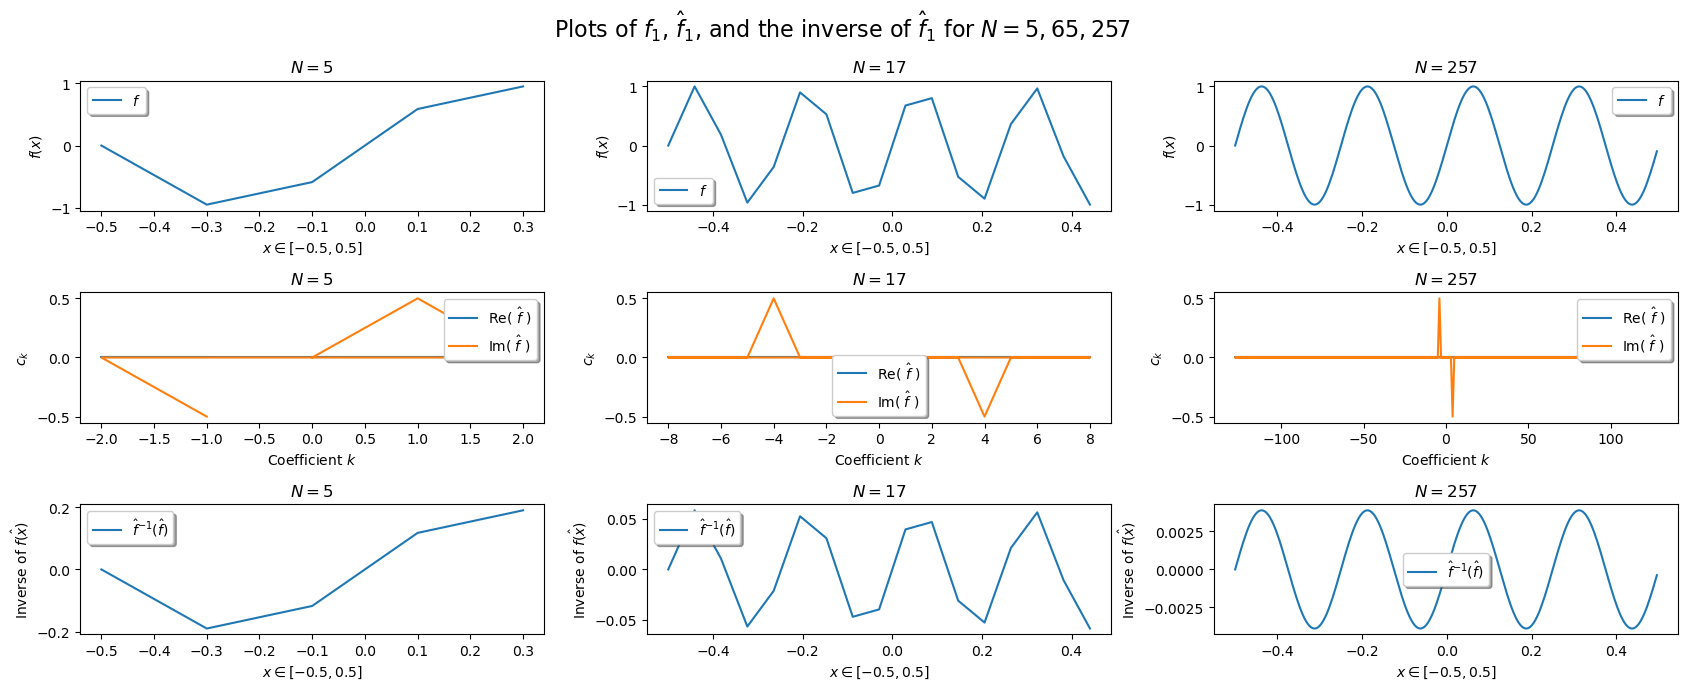

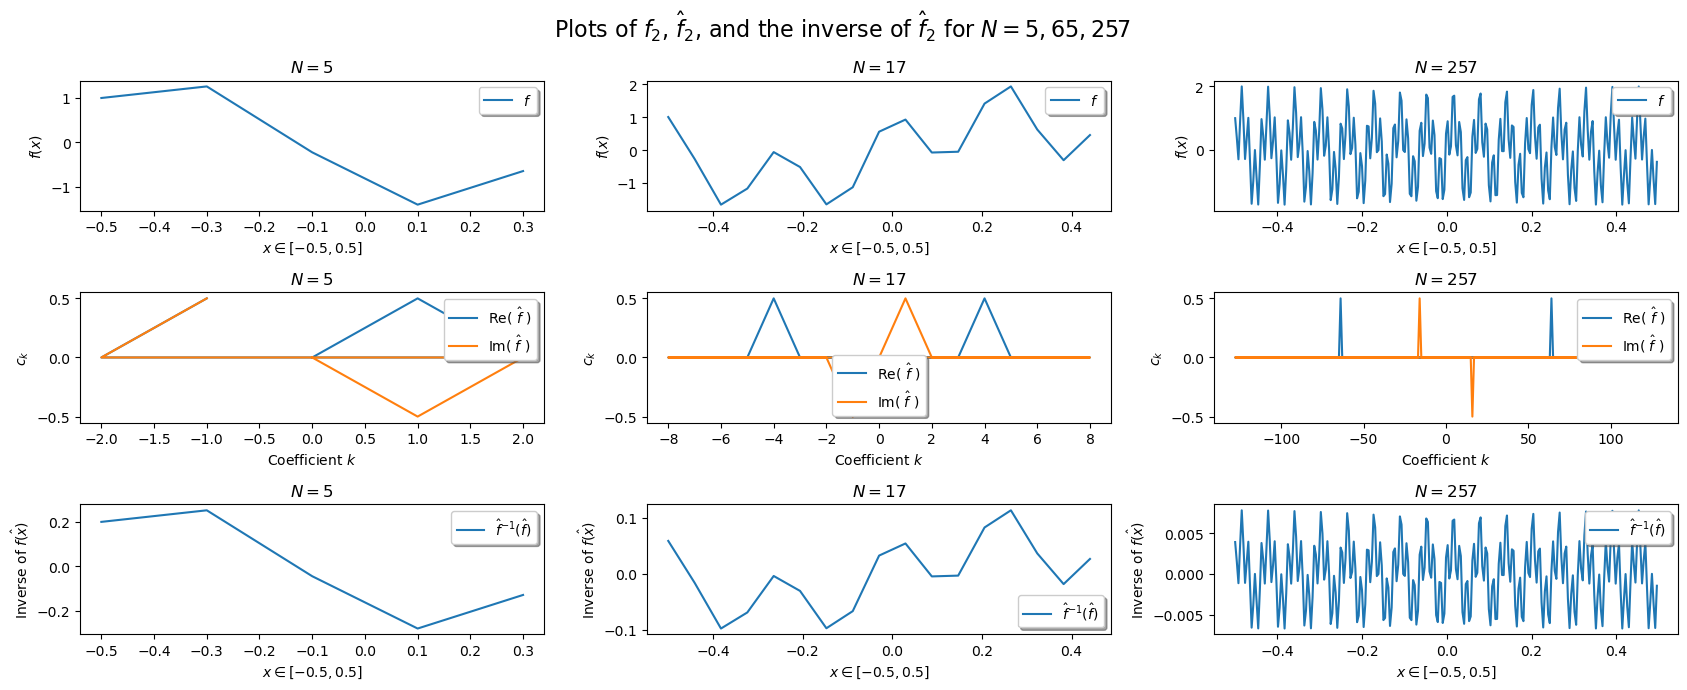

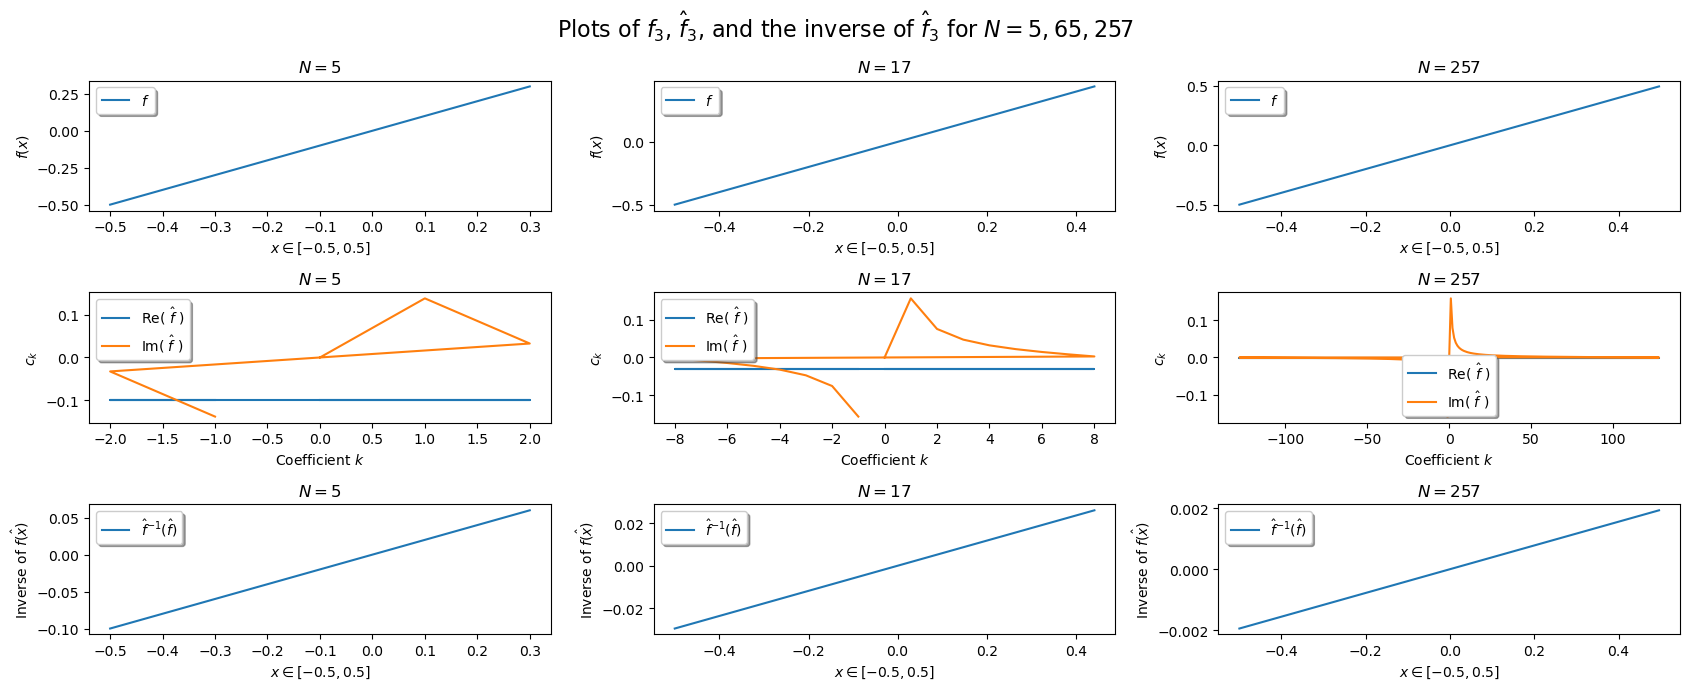

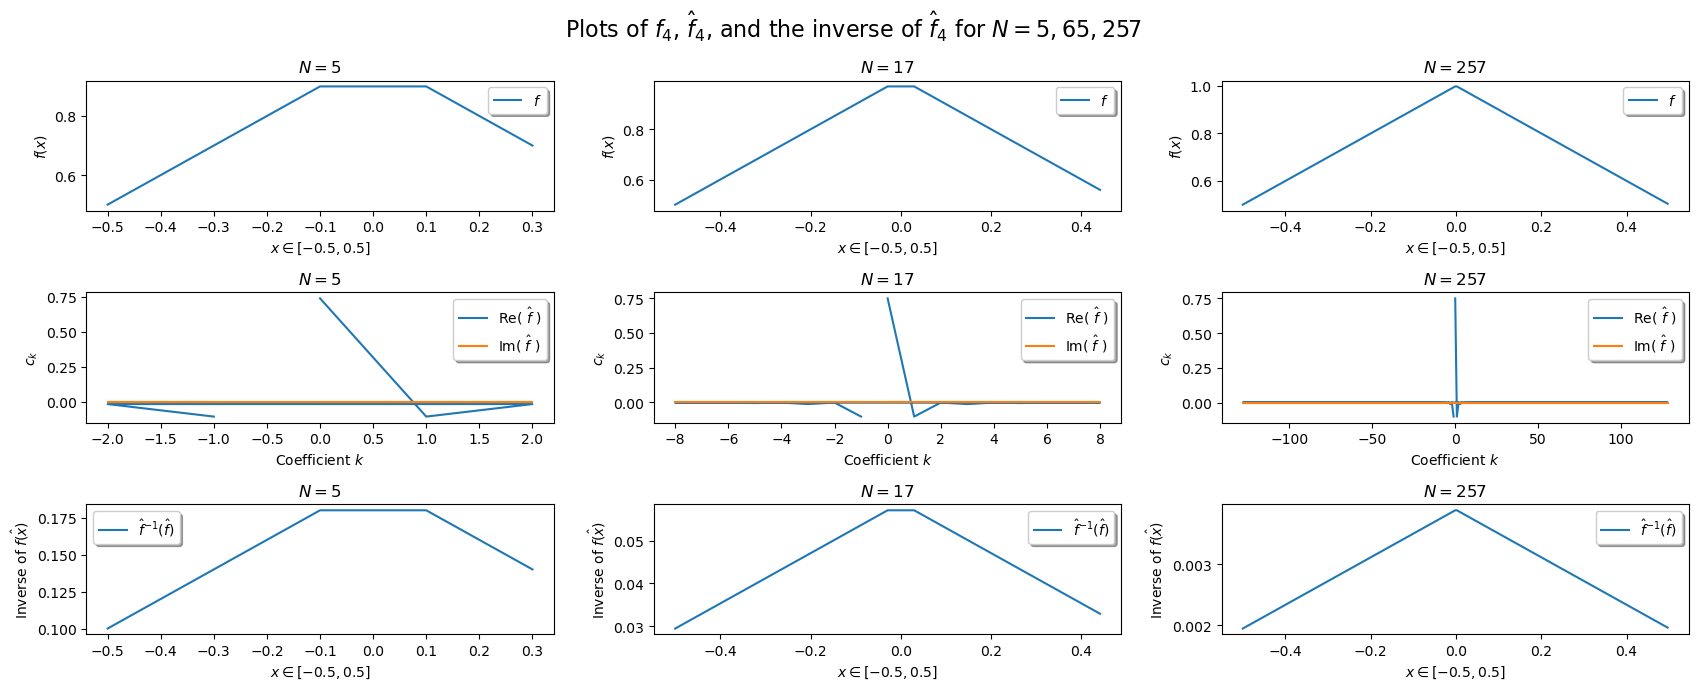

In [5]:
titles = [r'Plots of $f_1$, $\hat{f}_1$, and the inverse of $\hat{f}_1$ for $N = 5, 65, 257$', 
          r'Plots of $f_2$, $\hat{f}_2$, and the inverse of $\hat{f}_2$ for $N = 5, 65, 257$',
          r'Plots of $f_3$, $\hat{f}_3$, and the inverse of $\hat{f}_3$ for $N = 5, 65, 257$',
          r'Plots of $f_4$, $\hat{f}_4$, and the inverse of $\hat{f}_4$ for $N = 5, 65, 257$']
N_array = np.array([5, 17, 257])
start = -0.5
 
plotter(f1, N_array, -0.5, titles[0])
plotter(f2, N_array, -0.5, titles[1])
plotter(f3, N_array, -0.5, titles[2])
plotter(f4, N_array, -0.5, titles[3])

The figures above represent a 3 by 3 plotting for each function $f_i(x), \; i \in {1,2,3,4}$, where the columns each represent different values for the samples $N$, and the rows represent the plot of the function $f_i(x)$, its Fourier transform $\hat{f_k}$ and the inverse of the Fourier transform respectively. 

We can clearly see a tendency in which the lower the number of samples $N$, the worse the quality of the plots of the functions, as well as the plots of the Fourier transforms. The Fourier transforms in this cases are of little use, as the indeces $k$ of the Fourier coefficients are much lower that $N$. This means that we are computing the wrong result for the indeces. 

However,looking at the plots for $f_1$, we can see that for $N = 17$ and $N = 257$, the resulting plots seem to be in line with expectations, and the indeces for the Fourier coefficients are correct. This cannot be said for $f_2$, where the indeces for the Fourier transform are much higher than $N=17$, meaning that we have to rely on the graph for $N=257$ to get the correct results. 

For the non-sine and non-cosine functions, that is $f_3$ and $f_4$, we can see that no matter how high the number of samples, the results for the Fourier coefficients are not clear, vertical lines. They seem to be more chatotic. This is of coure due to the property of the Fourier transform, where we purely rely on sine- and cosine-waves to describe a function. Hence, the chaotic result. 

With this said, we can clearly see that the Fourier transform approximates well all of the given functions, however the quality of the approximation is mostly dependent of the number of samples $N$. We can clearly see that when $N>2K$, the approximation works well for sine- and cosine-functions. For non-sine- and non-cosine-functions, the approximation seems to be working well enough no matter how high or little the number of samples $N$. 

**i)** Lets now take a closer look on $f_2(x)$, and plot its discrete Fourier coefficients $\bf{\hat{f}}$ for $N=17, 65, 257$ after applying the `scipy`-function `fftshift`. 


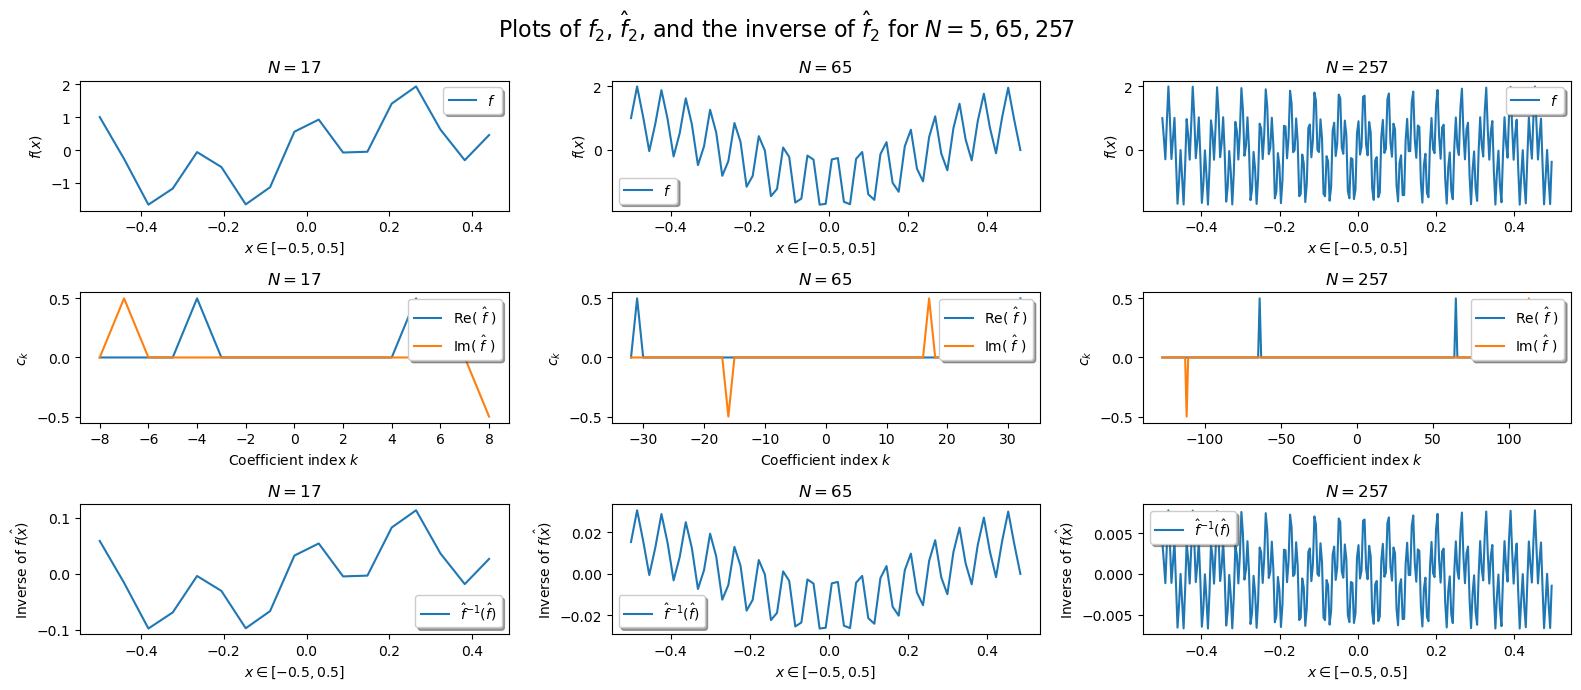

In [6]:
titles = [r'Plots of $f_2$, $\hat{f}_2$, and the inverse of $\hat{f}_2$ for $N = 5, 65, 257$']

N_array = np.array([17,65,257])
plotter(f2, N_array, -0.5, titles[0], shift=True)

Given that 
$$
f_2(x) = \text{sin}(32\pi x) + \text{cos}(128 \pi x), \; x \in \mathbb{T},
$$

we can immediately deduct - without even solving an integral - that the indeces $k$ of the coefficients $a_k$ and $b_k$ are equal to $64$ and $16$ respectively. Both of them are valued at 1.

Using the same logic for $c_k$, we can compute that $k_1=-128$, $k_2=-32$, $k_3=32$ and $k_4=128$, as well as that $c_{-128}=\frac{1}{2}$, $c_{-32}=-\frac{1}{2i}$, $c_{32}=\frac{1}{2i}$, $c_{128}=\frac{1}{2}$ and nil for all other indeces $k$. Taking a look on the graph above for the Fourier transform of $f_2$ for $N=257$, we can see that the Fourier coefficients $c_k$ computed by the programme indeed correspond to the analytical values. Note that the Fourier coefficients $c_k$ for $N=17$ and $N=65$, are incorrect, as the number $N$ is too low to find the right values in this case. 

The `fftshift`-function rearranges a Fourier transform by shifting the zero-frequency component to the center of the spectrum. However, in this exercise, the use of the `fftfreq`-function has been more useful to plot the correct values for the indeces $k$. 

Lets now remove the second summand of $f_2$ by just modifying $\hat{f}_k \in \mathbb{C}$. To do so, we will have to use Euler's identity, as well as the complex coefficients of Fourier transforms $c_k$. 

This is quite fundamental, and it is sufficient to just set the real non-zero entries of $\hat{f}_k$ to zero, such that $c_{-64} = c_{64} = 0$. Now, to prove these thoughts, we can inverse the Fourier transform of the modified $\hat{f}$. The code below does exactly that. 

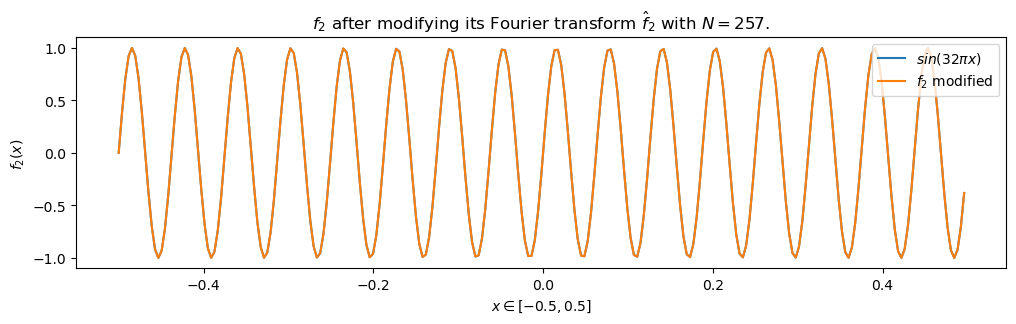

In [7]:
f_transformed = transform(f2, 257, -0.5)
f_transformed_modified = f_transformed - f_transformed.real
f_modified = sp.fft.ifft(f_transformed_modified, norm="forward")

x = np.linspace(-0.5, 0.5, 257, endpoint = False)
y = np.sin(32*np.pi*x)

#plotting
plt.figure(figsize=(12,3))
plt.title(r"$f_2$ after modifying its Fourier transform $\hat{f}_2$ with $N=257$.")
plt.plot(x, y, label=r'$sin(32\pi x)$')
plt.plot(x, f_modified, label=r'$f_2$ modified')
plt.legend(shadow=False, loc=1)
plt.xlabel(r"$x \in [-0.5, 0.5]$")
plt.ylabel(r"$f_2(x)$")
plt.show()

We can see that this worked quite well. However, this does not work as well for $N=17$, as we will see in the graph below.

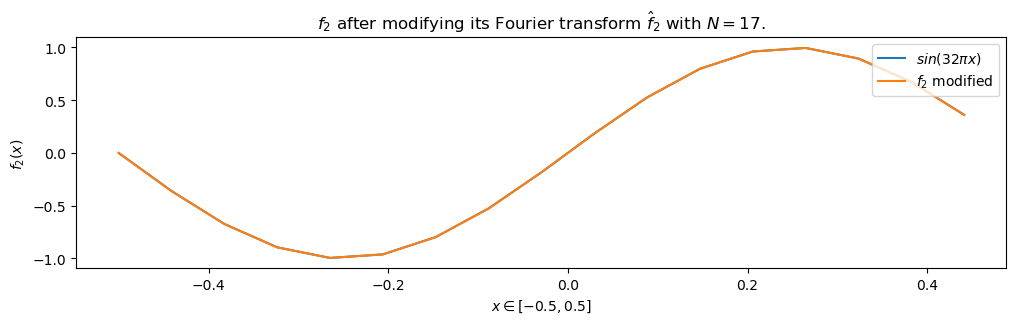

In [8]:
f_transformed = transform(f2, 17, -0.5)
f_transformed_modified = f_transformed - f_transformed.real
f_modified = sp.fft.ifft(f_transformed_modified, norm="forward")

x = np.linspace(-0.5, 0.5, 17, endpoint = False)
y = np.sin(32*np.pi*x)

#plotting
plt.figure(figsize=(12,3))
plt.title(r"$f_2$ after modifying its Fourier transform $\hat{f}_2$ with $N=17$.")
plt.plot(x, y, label=r'$sin(32\pi x)$')
plt.plot(x, f_modified, label=r'$f_2$ modified')
plt.legend(shadow=False, loc=1)
plt.xlabel(r"$x \in [-0.5, 0.5]$")
plt.ylabel(r"$f_2(x)$")
plt.show()

In the figure above, we can see that the number of samples $N$, clearly is not enough to reproduce the correct graph of $f_2$ as shown in the previous figure for $N=257$. This can be explained by the Nyquist-Shannon theorem which states that for a signal that contains no frequencies higher than $N$, the function is determined by a sample of the signal performed at a rate of $\frac{1}{2N}$. Thus, the DFT no longer equals the Fourier coefficients, and we do no longer get the correct result.

### Task 2: Signal Processing

**a)** Let 

$$
\begin{equation}
(\textbf{a $\ast$ b})_j = \sum_{k=0}^{N-1} a_kb_{j-k \; \text{mod} \; N},
\end{equation}
$$
and $\textbf{b'}$ be $\textbf{b}$-shifted, such that
$$
\textbf{b'}_{j-k} = \textbf{b}_{j-k-1}.
$$

We hereby get,

$$
\begin{equation}
(\textbf{a $\ast$ b'})_j = \sum_{k=0}^{N-1} a_kb'_{j-k \; \text{mod} \; N},
\end{equation}
$$

Looking closely at $\textbf{b'}$, we can see that when $j-k=0$, then $\textbf{b'}_0$ is $\textbf{b}_{N-1}$, meaning that we can write $b'_{j-k \; \text{mod} \; N}$ as $b_{j-k-1 \; \text{mod} \; N}$. This gives us

$$
\textbf{c'} = \sum_{k=0}^{N-1} a_kb_{j-k-1 \; \text{mod} \; N},
$$

which is a shifted version of $\textbf{c}$.

**b)** In this exercise, it is asked to prove, given $f, g \in L_1(\mathbb{T}$ and $k \in \mathbb{Z}$, that
$$
\begin{equation}
c_k(f \ast g) = c_k(f) c_k(g).
\end{equation}
$$

Now, before we can prove that claim, lets recall two important theorems that will come in handy in this exercise. The first theorem is the Fubini theorem which states that, if $(f(x, y))$ is continuous on the region $([a, b] \times [c, d])$, then
$$
\begin{equation}
 \int_{a}^{b} \left( \int_{c}^{d} f(x, y) \, dy \right) dx = \int_{c}^{d} \left( \int_{a}^{b} f(x, y) \, dx \right) dy, 
\end{equation}
$$
or in other words, it is possible to interchange the order of integration.

In addition to that, the shift-theorem will also be crucial for the proof. 

Now, using both theorems, we can prove that:
$$
\begin{equation}
c_k(f \ast g) = \int_{\mathbb{T}} (f \ast g) e^{-2\pi ikx} \text{d}x = \\
= \int_{\mathbb{T}} \bigg[ \int_{\mathbb{T}} f(y)g(x-y) \text{d}y \bigg] e^{-2\pi ikx} \text{d}x = \\
= \int_{\mathbb{T}}f(y) \bigg[ \int_{\mathbb{T}} g(x-y) e^{-2\pi ikx}\text{d}x \bigg] \text{d}y \; \; (Fubini's \;  theorem) =\\
= \int_{\mathbb{T}}f(y) \bigg[ \int_{\mathbb{T}} g(x) e^{-2\pi ikx} e^{-2\pi iky}\text{d}x \bigg] \text{d}y \; \; (Shift-theorem) = \\
= \int_{\mathbb{T}}f(y) \bigg[ \int_{\mathbb{T}} g(x) e^{-2\pi ikx}\text{d}x \bigg]  e^{-2\pi iky} \text{d}y = \\
= c_k(g) \int_{\mathbb{T}}f(y) e^{-2\pi iky} \text{d}y = c_k(f)c_k(g) \square
\end{equation}
$$

By using the same approach as above, it should be straightforward that 
$$
\begin{equation}
(\bf{a} \ast \bf{b}) = \bf{a} \circ \bf{b},
\end{equation}
$$

meaning that 
$$
\begin{equation}
(\bf{a} \ast \bf{b}) \hat{} = \hat{\bf{a}} \circ \hat{\bf{b}},
\end{equation}
$$

**c)** Given the Dirichlet kernel,
$$
\begin{equation}
D_n(x) = 1 + 2\sum_{m = 1} ^{n} \text{cos}(2\pi mx), \; n \in \mathbb{N},
\end{equation}
$$
lets compute the Fourier coefficients $c_k(D_n)$ of the kernel. Note that I have changed the index $k$ in the Dirichlet kernel to the index $m$ on purpose so that it does not get confused with the index $k$ of the Fourier coeffieicients $c_k$.

$$
\begin{equation}
c_k(D_n(x)) = \langle D_n, e^{2 \pi ik\cdot} \rangle = \int_{\mathbb{T}} \bigg[1 + 2\sum_{m = 1} ^{n} \text{cos}(2\pi mx) \bigg]e^{2 \pi ikx} \text{d}x = \\
= \int_{\mathbb{T}}e^{2 \pi ikx} \text{d}x + 2 \int_{\mathbb{T}}\sum_{m = 1} ^{n} \text{cos}(2\pi mx)e^{2 \pi ikx} \text{d}x = \\
= 0 + 2 \sum_{m = 1} ^{n} \int_{\mathbb{T}}\text{cos}(2\pi mx) \bigg[\text{cos}(2\pi kx) - i \text{sin}(2\pi kx) \bigg],
\end{equation}
$$

and using the orthogonality relationships found in previous exercises, the integral results to 

$$
\begin{equation}
c_k(D_n(x)) = 
\begin{cases}
        1 & \text{if $m = n \neq 0$},\\
        0 & \text{else.}
    \end{cases}
\end{equation}
$$

Since we are performing a Discrete Fourier Transform (DFT), applying the Dirichlet kernel as a filter, especially in signal processing applications, by using equidistant samples $d_j := D_n \bigg( \frac{j}{N}\bigg)$ is crucial. The reason for that is that we assume in the DFT that the input signal is sampled at equidistand point. Hence, using equidistant samples is natural in this context. 

**d)** Lets take a look back on $f_2$ and sample that function with $N=512$ samples. USing the results from previous exercises, lets convolve $f_2$ with the Dirichlet kernel $D_n(x)$, where we choose $n$, the number of samples for the Dirichlet kernel, to be $n=48$. 

In [9]:
'''''
The code below is the implementation of the Dirichlet kernel. 
Takes in:
    - x: a scalar or an array for the values of the x-axis
    - n: number of samples for the Dirichlet kernel
Returns: 
    - D_n(x): the Dirichlet kernel for the given parameters. 
'''''

def Dirichlet(x,n):
    sum_cos = 0
    
    for k in range(1,n+1):
        sum_cos += np.cos(2*np.pi*k*x)
    return 1 + sum_cos*2

In [10]:
'''''
The code below calculates the convolution of a given signal y with a kernel of choice, and returns the real part 
of the inverse of the convolution.  
Takes in:
    - y: y-values of a function
    - N: number of samples for the Fourier transform
    - kernel: pre-calculated values of the kernel
Returns:
    - x_signal: indeces k for the transform
    - Ff: Fourier tranfsorm of the function
    - inverse_convolution.real: Real part of the inverse of the convolution

'''''
def Convolution(y, N, kernel): 
        x_signal = sp.fft.fftfreq(N,1/N)
        
        Ff = sp.fft.fft(y, norm = "forward") #Fourier transform of the y-values
        
        convolution = Ff * sp.fft.fft(kernel, norm = "forward") #c_k * Fourier transform of the kernel = convolution
        inverse_convolution = sp.fft.ifft(convolution) #inversing the convolution
        
        return x_signal, Ff, inverse_convolution.real

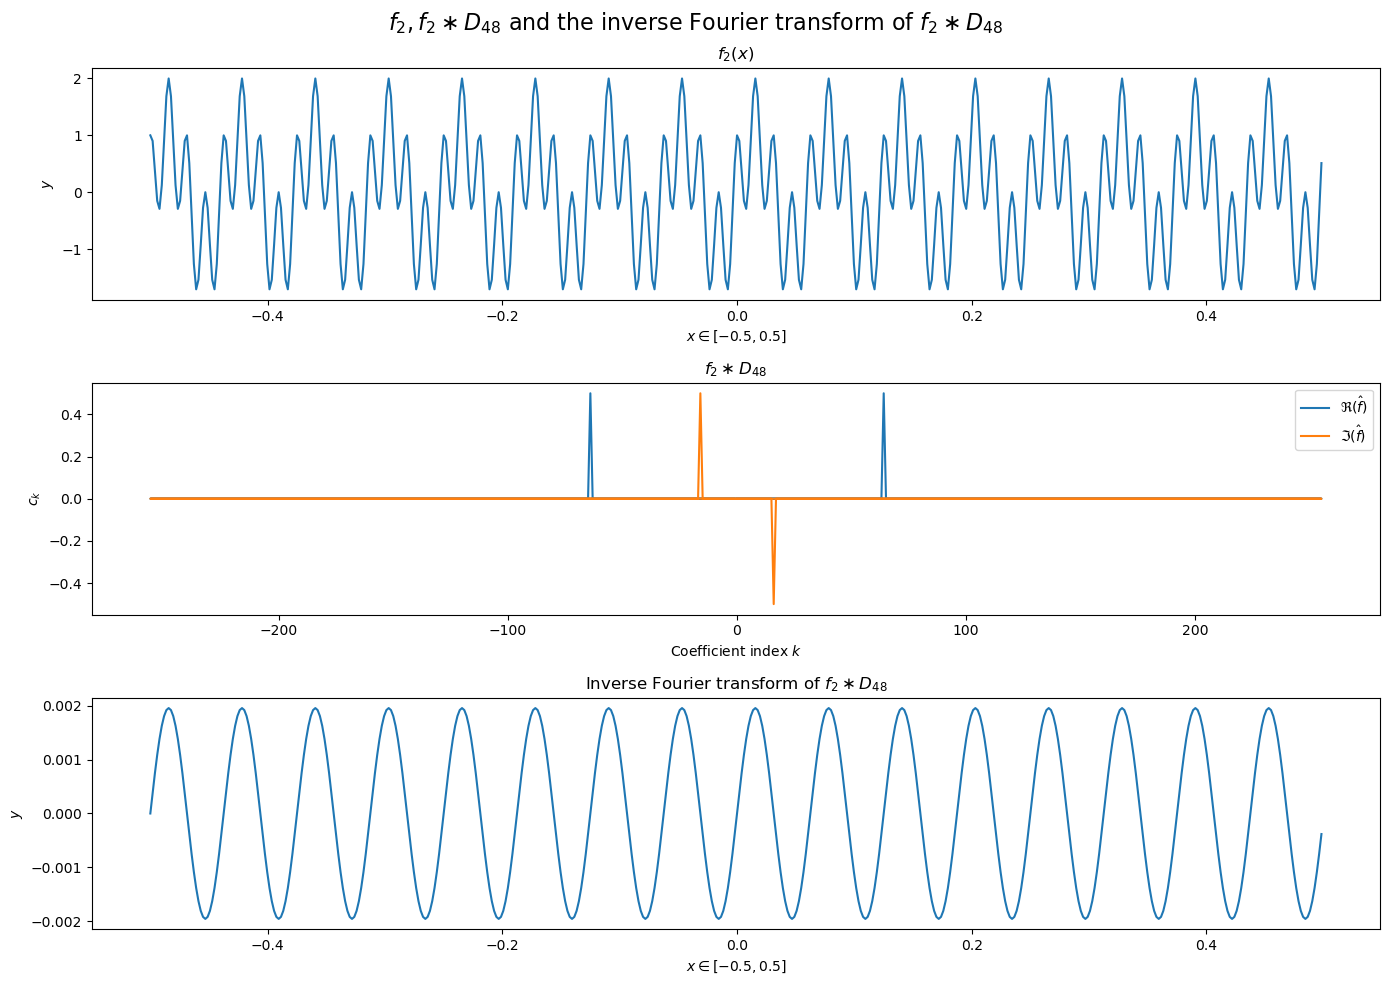

In [11]:
#initial values
n = 48
N = 512
start = -0.5
title = r'Plot of $f_2$ and $\hat{f}_2$ for $N = 512$' 

#calling the necessary functions
x = np.linspace(start, start+1, N, endpoint=False)
y = f2(x)
dirichlet = Dirichlet(x,n)
x_signal, Ff, inverse_convolution = Convolution(y, N, dirichlet)

#plotting
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
fig.suptitle(r"$f_2, f_2 \ast D_{48}$ and the inverse Fourier transform of $f_2 \ast D_{48}$", fontsize=16)

ax[0].plot(x, y, label=r'$f(x)$')
ax[1].plot(x_signal, Ff.real, label=r'$\Re(\hat{f})$')
ax[1].plot(x_signal, Ff.imag, label=r'$\Im(\hat{f})$')
ax[2].plot(x, inverse_convolution, label='Convolution of the signal')

ax[0].set_title(r'$f_2(x)$')
ax[1].set_title(r'$f_2 \ast D_{48}$')
ax[2].set_title(r'Inverse Fourier transform of $f_2 \ast D_{48}$')

ax[0].set_xlabel(r'$x \in{[-0.5 , 0.5]}$')
ax[1].set_xlabel(r'Coefficient index $k$')
ax[2].set_xlabel(r'$x \in{[-0.5 , 0.5]}$')

ax[0].set_ylabel(r'$y$')
ax[1].set_ylabel(r'$c_k$')
ax[2].set_ylabel(r'$y$')

ax[1].legend()

fig.tight_layout()
plt.show()

In the figure above, we can see the original signal $f_2$ on the top, its convolution with the Dirichlet kernel $D_{48}$ in the middle, and the inverse Fourier transform of the convolution underneath. As we can see, the the signal appears to have become smoother, all while the amplitude has become lower.  

**e)** Now, consider the given data `project1-1e-data.csv`. This data contains the x- and y-values of an unknown signal. In this exercise, we are going to convolve this signal with two kernels: the Dirichlet kernel $D_{92}(x)$ and $\textbf{h} = (-1,2,-1,0,..,0)^T \in \mathbb{R}^N$, where $N$ is the lenght of the signal from the file. 

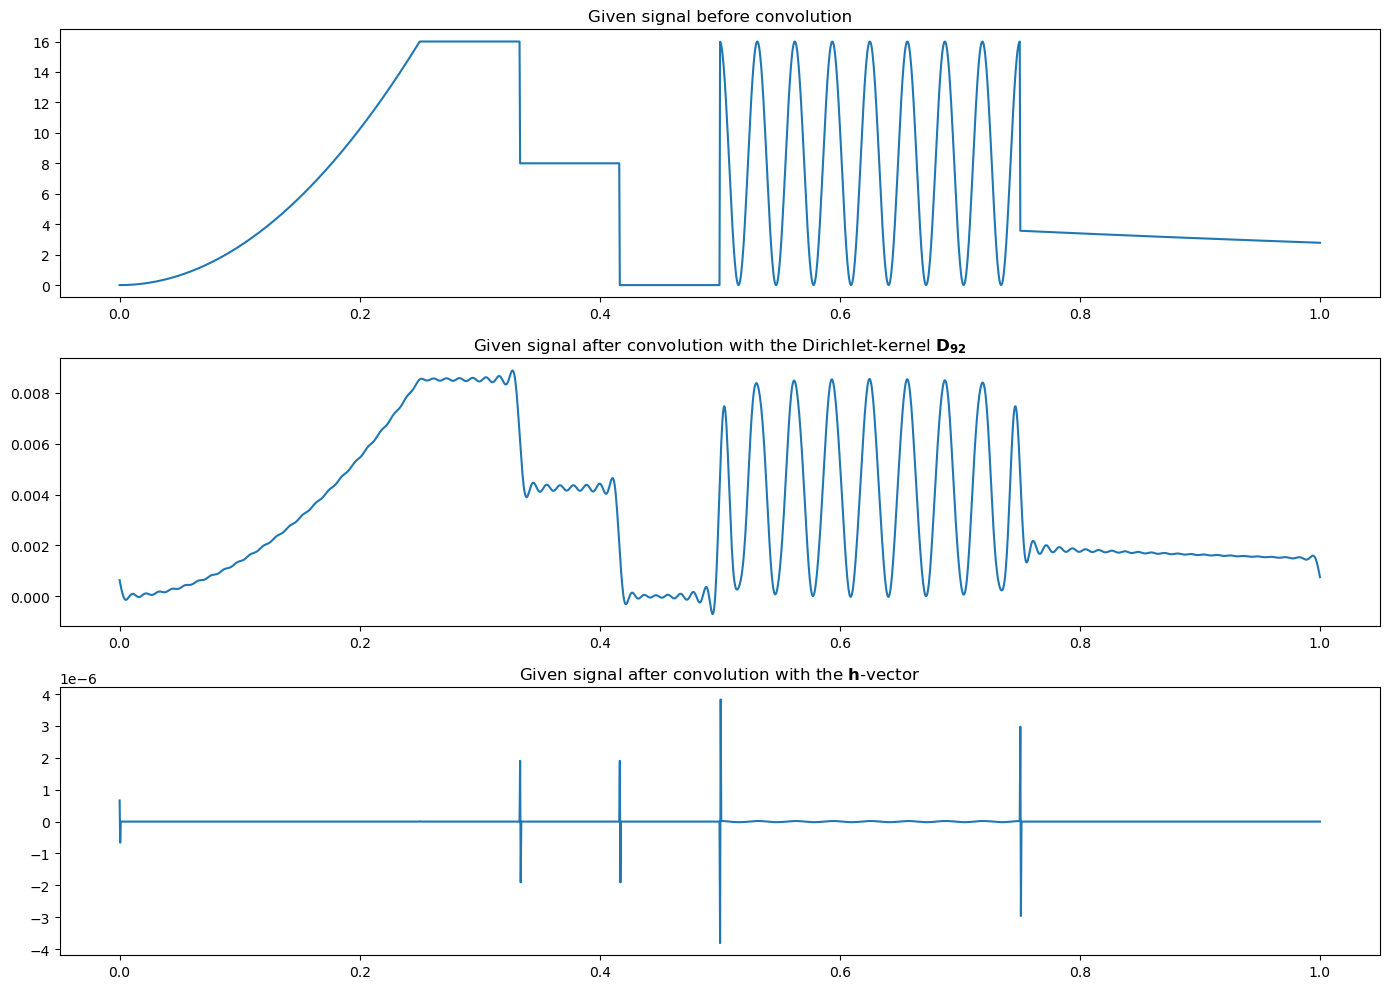

In [12]:
#using pandas as it is better to handle irregularities within the data 
data = np.array(pd.read_csv('project1-data/project1-1e-data.csv')) 

x = data[:, 0]
y = data[:, 1]
n = 92
N = len(y)

dirichlet = Dirichlet(x, n)
h = np.zeros(N)
h[0], h[1], h[2] = -1, 2, -1

x_signal_dirichlet, Ff_dirichlet, convolution_dirichlet = Convolution(y, N, dirichlet)
x_signal_h, Ff_h, convolution_h = Convolution(y, N, h)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14,10))

ax[0].plot(x, y) #signal without convolution
ax[1].plot(x, convolution_dirichlet) #dirichlet
ax[2].plot(x, convolution_h) #h vector

ax[0].set_title("Given signal before convolution")
ax[1].set_title(r"Given signal after convolution with the Dirichlet-kernel $\bfD_{92}$")
ax[2].set_title(r"Given signal after convolution with the $\bf{h}$-vector")

fig.tight_layout()
plt.show()

The figure above shows us three different plots, where the one on top is the plot of the given signal before the convolution with one of the filters, the plot in the middle shows us the convolution with the Dirichlet kernel $D_{92}$, and lastly the plot on the bottom shows us the convolution with the $\textbf{h}$-filter. 

Taking a closer look on the convolution with Dirichlet kernel, we csan see that the filter does fairly well to recreate the original signal, with minor deviations from the original signal. 

Meanwhile, the $\textbf{h}$-filter seems at first to be very innacurate and does not well to recreate the original signal. However, it seems more that the $\textbf{h}$-filter shows us where exactly the signal is changing its property, i.e. when the signal has turning points, giving us a further understanding of the given signal. This could be crucial in, for instance, finance, where both filters could give a better insight on how a given signal, i.e. the finance market, could be predicted in the future.

**f)** We know that the Dirichlet-kernel is a low-pass filter, meaning that it allows signals with a frequency loawer than a certain "cutoff" frequency to pass through, as well as reduces frequencies higher than the cutoff frequency. We can imagine that, in the frequency domain, the low-pass filter's effect can be visualised as a "window" that is "open" for low frequencies and "closed" for higher frequencies. Mathematically, we can summarize the effect of the Dirichlet-kernel on frequencies as the following

$$
\begin{equation}
H_n(x) = 
\begin{cases}
        1 & \text{for $|x|≤x_c$ }\\
        0 & \text{else} \\
    \end{cases}
\end{equation}
$$

Now, recall the result from 2c), where we found that 
$$
\begin{equation}
c_k\bigg(D_n(x)\bigg) = 
\begin{cases}
        1 & \text{for $m=k ≠ 0$ }\\
        0 & \text{else} \\
    \end{cases},
\end{equation}
$$

which exactly corresponds with the definition of a low-pass filter. Now, to get the opposite effect, we would want to have a kernel that cuts off lower frequencies all while letting higher frequencies pass throught the filter. This means that we would need to modify our kernel in such way that

$$
\begin{equation}
c_k\bigg(D_n(x)\bigg) = 
\begin{cases}
        0 & \text{for $m=k ≠ 0$ }\\
        1 & \text{else} \\
    \end{cases},
\end{equation}
$$

so that,

$$
\begin{equation}
H_n(x) = 
\begin{cases}
        1 & \text{for $|x|≥x_c$} \\
        0 & \text{else}\\
    \end{cases}
\end{equation}
$$
    
This fundamentally means that we can create a high-pass filter by solving the following equation

$$
\text{High-pass filter} = 1 - \text{Low-pass filter},
$$

and hence getting the opposite effect of a Dirichlet-kernel. 

**g)** If we have a certain set of frequencies, say for the (not yet sampled function) $c_k(f)$, where $40 ≤ |k| ≤ 64$, of interest, we would either have to use a different kernel, or scale and shift the Dirichlet-kernel in such way that only the frequencies of interest can pass through. 

To find an adjusted Dirichlet-kernel, lets start by denotind the center of the desired frequencies as $f_c$, and the bandwidth as $BW$, i.e.

$$
\begin{equation}
f_c = \frac{\frac{40}{N}f_s+\frac{64}{N}f_s}{2} \\
BW = \frac{64}{N}f_s - \frac{40}{N}f_s
\end{equation}
$$

To scale and shift the Dirichlet-kernel, we have to adjust $x = 2\pi f$ by a scaling factor of $S$, such that 

$$
\begin{equation}
S = \frac{BW}{BW_{\text{Dirichlet}}} \\
x_{\text{scaled}} = x \cdot S \\
x_{\text{shifted}} = x_{\text{scaled}} + 2\pi f_c,
\end{equation}
$$

which results in the following Dirichlet-kernel
$$
\begin{equation}
D_n(x_{\text{shifted}}) = 1 + 2\sum_{k=1}^n \text{cos}(kx_{ \text{shifted}}) = \\
= 1 + 2\sum_{k=1}^n \text{cos}\bigg(k(x_{\text{scaled}} + 2\pi f_c)\bigg)
\end{equation}
$$



### Task 3: Image processing

**a)** Given that the 1D-Fourier Transform can be computed in $\mathcal{O}(N \text{log}N)$, we can show that the 2D-Fourier transform can be computed in the same fast way, that is $\mathcal{O}(N_1 N_2 \text{log}(N_1N_2))$.

We can break the Fourier transform in 2D down 1D steps only. Given that we have $N_1$ rows and $N_2$ columns, the computation time for a single row will be $\mathcal{O}(N_2\text{log}(N_2))$. Now, for if we put all the rows together, the runtime will be $\mathcal{O}(N_1 N_2\text{log}(N_2))$. Using the same logic, the computation time for the columns will be $\mathcal{O}(N_1 N_2\text{log}(N_1))$. Putting these together, we get 
$$
\begin{equation}
\mathcal{O}(N_1 N_2\text{log}(N_2)) + \mathcal{O}(N_1 N_2\text{log}(N_1)) = \\
= \mathcal{O}(N_1 N_2\text{log}(N_2) + \mathcal{O}(N_1 N_2\text{log}(N_1)) = \\
= \mathcal{O}(N_1 N_2\text{log}(N_1N_2))
\end{equation}
$$

**b)** Now, lets consider the function 

$$
f(\textbf{x}) = 1 + \frac{1}{2}\text{sin}(2\pi \textbf{x$^T$ k}), \textbf{x} \in [0,1]^2,
$$

for the three cases $k \in \{(5,0)^T,(0,10)^T,(8,8)^T\}$. In this exercise, I am going to plot these as images for $N_1=N_2=64$, as well as their amplitude $|\hat{F}|$, i.e. the absolute value of the discrete Fourier transform. 

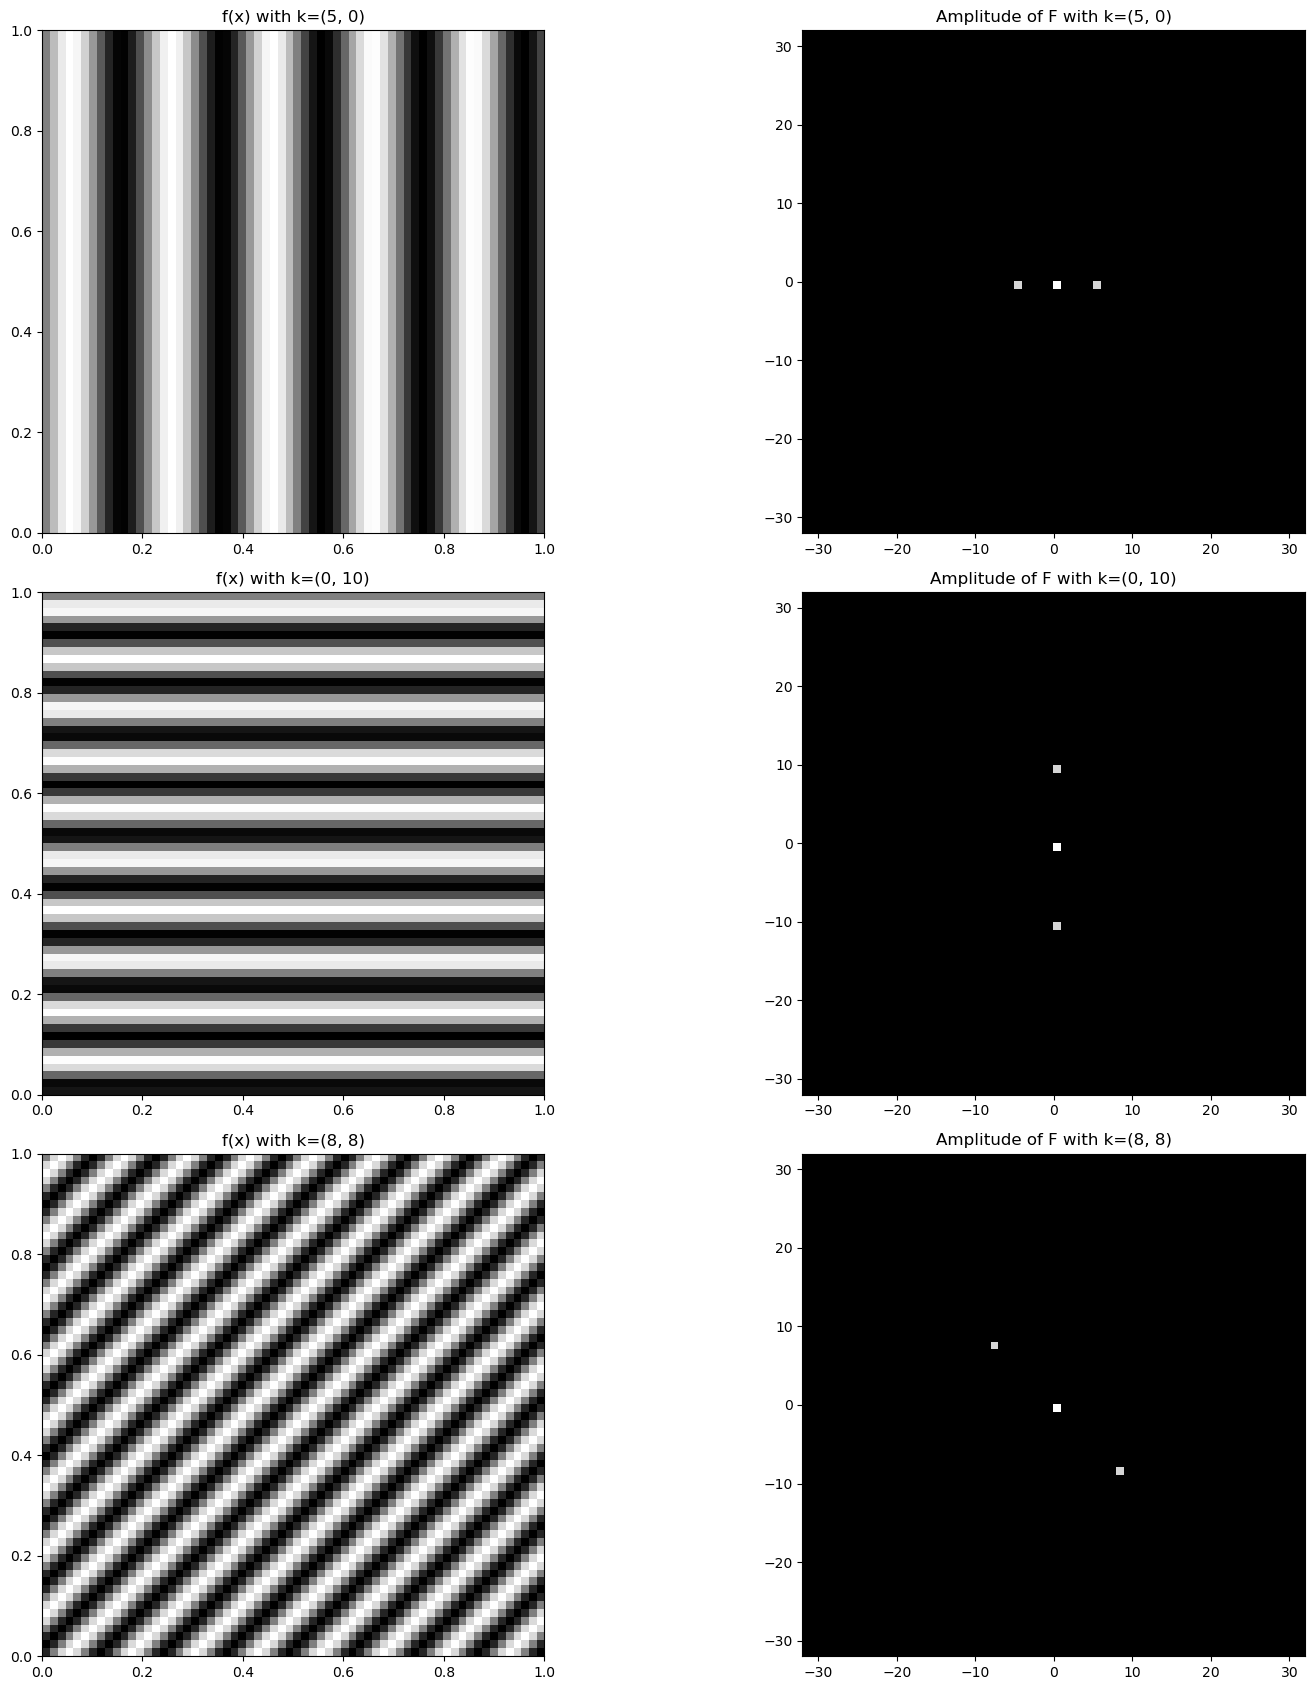

In [13]:
#defining the function f(x)
def f(x, y, kx, ky):
    return 1 + 0.5 * np.sin(2*np.pi*(kx*x + ky*y))

#setting the parameters
N1 = N2 = 64
k_values = [(5, 0), (0, 10), (8, 8)]

#generating x and y coordinates
x = np.linspace(0, 1, N1, endpoint=False)
y = np.linspace(0, 1, N2, endpoint=False)
x, y = np.meshgrid(x, y)

#plotting
plt.figure(figsize=(17, 17))

for i, (kx, ky) in enumerate(k_values):
    #evaluating f(x) for given k
    image = f(x, y, kx, ky)
    
    #computing the 2D Fourier Transform and shifting the zero frequency component to the center
    F_transform = sp.fft.fftshift(sp.fft.fft2(image))
    
    #computing the amplitude and map it to [0, 1]
    amplitude = np.abs(F_transform)
    amplitude_scaled = np.log(1 + amplitude) / (np.log(1 + np.max(amplitude)))
    
    #plotting the original function
    plt.subplot(len(k_values), 2, i*2 + 1)
    plt.imshow(image, cmap='gray', extent=[0, 1, 0, 1])
    plt.title(f'f(x) with k=({kx}, {ky})')
    
    #plotting the amplitude of its Fourier Transform
    plt.subplot(len(k_values), 2, i*2 + 2)
    plt.imshow(amplitude_scaled, cmap='gray', extent=[-N1//2, N1//2, -N2//2, N2//2])
    plt.title(f'Amplitude of F with k=({kx}, {ky})')

plt.tight_layout()
plt.show()

**c)** Now, lets get to the more exciting part of the project, where we finally get to test the Fourier Transform and the Dirichlet kernel on the image `barbara.gif`. The 2D-Dirchlet kernel is given as
$$
\begin{equation}
D_N(\textbf{x}) = D_{N_1}(x_1)D_{N_2}(x_2).
\end{equation}
$$

In addition to that, we will also check the convolution of the images on the following three kernels: 

$$
\begin{pmatrix}
0 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 0
\end{pmatrix}, \begin{pmatrix}
-1 & 2 & -1\\
-1 & 2 & -1\\
-1 & 2 & -1
\end{pmatrix},\begin{pmatrix}
-1 & -1 & -1\\
2 & 2 & 2\\
-1 & -1 & -1
\end{pmatrix}, \begin{pmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{pmatrix}
$$

which will be called for filter nr.1, filter nr.2, filter nr.3, and filter nr.4 respectively.

In [14]:
'''''
Dirichlet_2D is a function that calculates the Dirichlet kernel for 2 variables x1 and x2. It is based on the formula 
above, that is the one for the 2D-Dirichlet filter. 

Takes in:
    - x1: x1-values of dimension N1
    - x2: x2-values of dimension N2
    - n1: number of samples for x1 in the Dirichlet kernel
    - n2: number of samples for x2 in the Dirichlet kernel
Returns: 
    - the result of the Dirichlet kernel based on the given parameters. 
'''''

def Dirichlet_2D(x1, x2, n1, n2):  
    dirichlet = np.zeros((len(x1), len(x2)))
    if len(x1) > len(x2):
        #if the array x1 is bigger in size that x2, we will insert nils at the end of x2 so that both have 
        #the same dimensions
        x2_temp = np.zeros(len(x1))
        x2_temp[:len(x2)] = x2
        x2 = x2_temp
        
    if len(x2) > len(x1): 
        #if the array x2 is bigger in size that x1, we will insert nils at the end of x1 so that both have 
        #the same dimensions
        x1_temp = np.zeros(len(x2))
        x1_temp[:len(x1)] = x1
        x1 = x1_temp
    
    d1 = Dirichlet(x1, n1)
    d2 = Dirichlet(x2, n2)
    dirichlet[0] = d1*d2
    
    return dirichlet

In [15]:
'''''
Convolution_2D is a function that calculates the convolution of a given image y with a kernel of choice. It is
the exact same function as for the 1D-Convolution that we looked at previously, except that we now do not return the
indeces k for the transform and the Fourier tranfsorm of the image.

Takes in: 
    - y: y-values of a function
    - kernel: pre-calculated values of the kernel
Returns:
    - inverse_convolution.real: the real part of the inverse of the convolution
'''''

def Convolution_2D(y, kernel): 
    convolution = sp.fft.fft2(kernel, norm = "forward")*sp.fft.fft2(y, norm = "forward") #element-wise multiplication
    inverse_convolution = sp.fft.ifft2(convolution) #inversing the convolution

    return inverse_convolution.real #taking the real part of the convolution

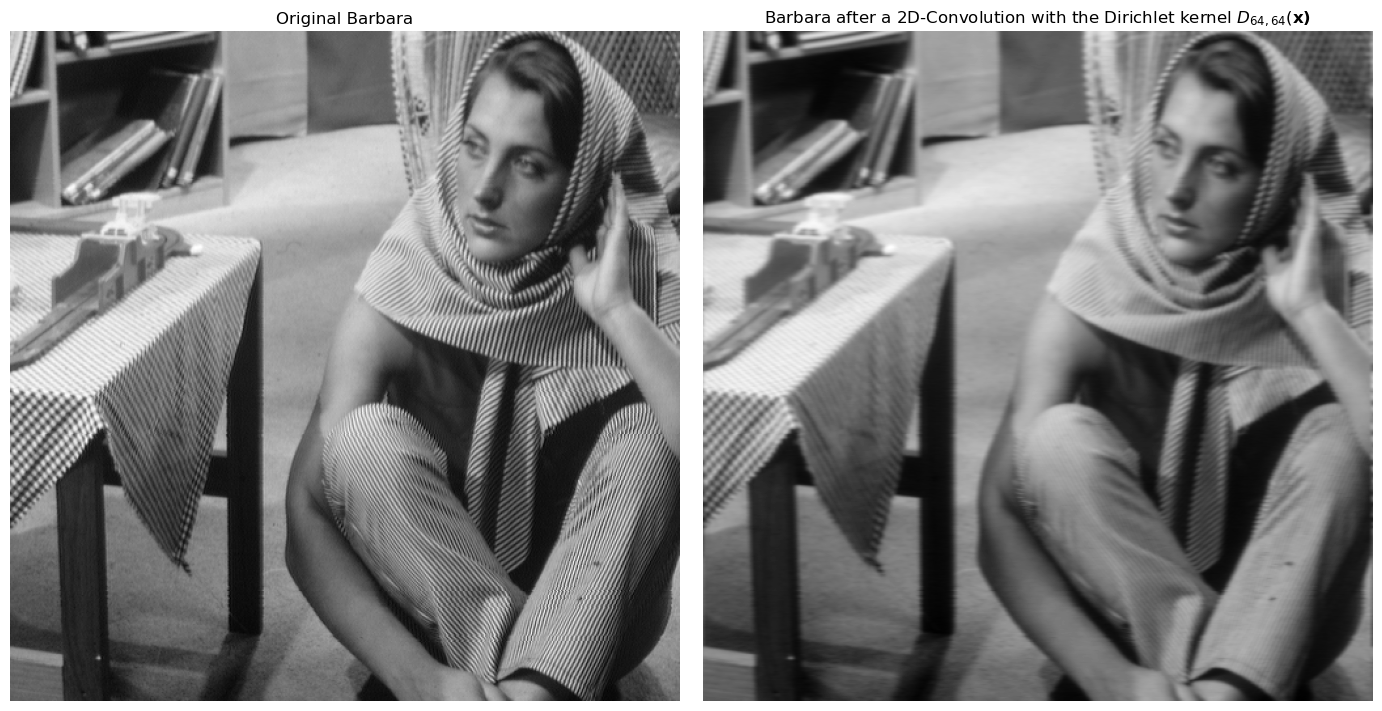

In [16]:
#Loading the GIF image
img_barbara = imageio.mimread('project1-data/barbara.gif')

#To work with the image as a np.array:
frame_barbara = np.array(img_barbara[0])

#Given constants
N = len(frame_barbara)
n1 = n2 = 64
x1 = np.linspace(0,1,N)
x2 = np.linspace(0,1,N)

#Given filters and kernels
filter1 = np.zeros((N, N))
filter1[[0, 1, 1, 2], [1, 0, 2, 1]] = -1
filter1[1, 1] = 4

filter2 = np.zeros((N,N))
filter2[[0, 0, 1, 1, 2, 2], [0, 2, 0, 2, 0, 2]] = -1
filter2[[0, 1, 2], 1] = 2

filter3 = np.zeros((N,N))
filter3[[0, 0, 0, 2, 2, 2], [0, 1, 2, 0, 1, 2]] = -1
filter3[1, [0, 1, 2]] = 2

filter4 = np.zeros((N,N))
filter4[[0, 0],[0, 2]] = 1
filter4[0,1] = 2
filter4[[2,2],[0,2]] = -1
filter4[2,1] = -2

dirichlet2D = Dirichlet_2D(x1, x2, n1, n2)

#calculating the convolutions
convolution2D_dirichlet = Convolution_2D(frame_barbara, dirichlet2D)
convolution2D_filter1 = Convolution_2D(frame_barbara, filter1)
convolution2D_filter2 = Convolution_2D(frame_barbara, filter2)
convolution2D_filter3 = Convolution_2D(frame_barbara, filter3)
convolution2D_filter4 = Convolution_2D(frame_barbara, filter4)

#displaying the image
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

#plotting the original frame
ax[0].imshow(frame_barbara, cmap='gray')
ax[0].axis('off')  # Turn off axis numbers
ax[0].set_title('Original Barbara')

#2D convolution with Dirichlet
ax[1].imshow(convolution2D_dirichlet, cmap='gray')
ax[1].axis('off')  # Turn off axis numbers
ax[1].set_title(r'Barbara after a 2D-Convolution with the Dirichlet kernel $D_{64,64}(\bf{x})$')

plt.tight_layout()  
plt.show()

The figure above shows us the original image `Barbara.gif` on the left, as well as the the image after a convolution with the Dirichlet filter $D_{64,64}(\textbf{x})$. Comparing the results, we can see that the image after the convolution seems to be a bit more blurry and washed out. The reason why the image to the right is more blurry, is due to the fact that the Dirichlet kernel is a low-pass filter, meaning that some of the information with higher frequencies will not pass through the filter. This leads to an image with less contrast, and more blur. 

Now, lets consider the convolutions of the image with the other filters.

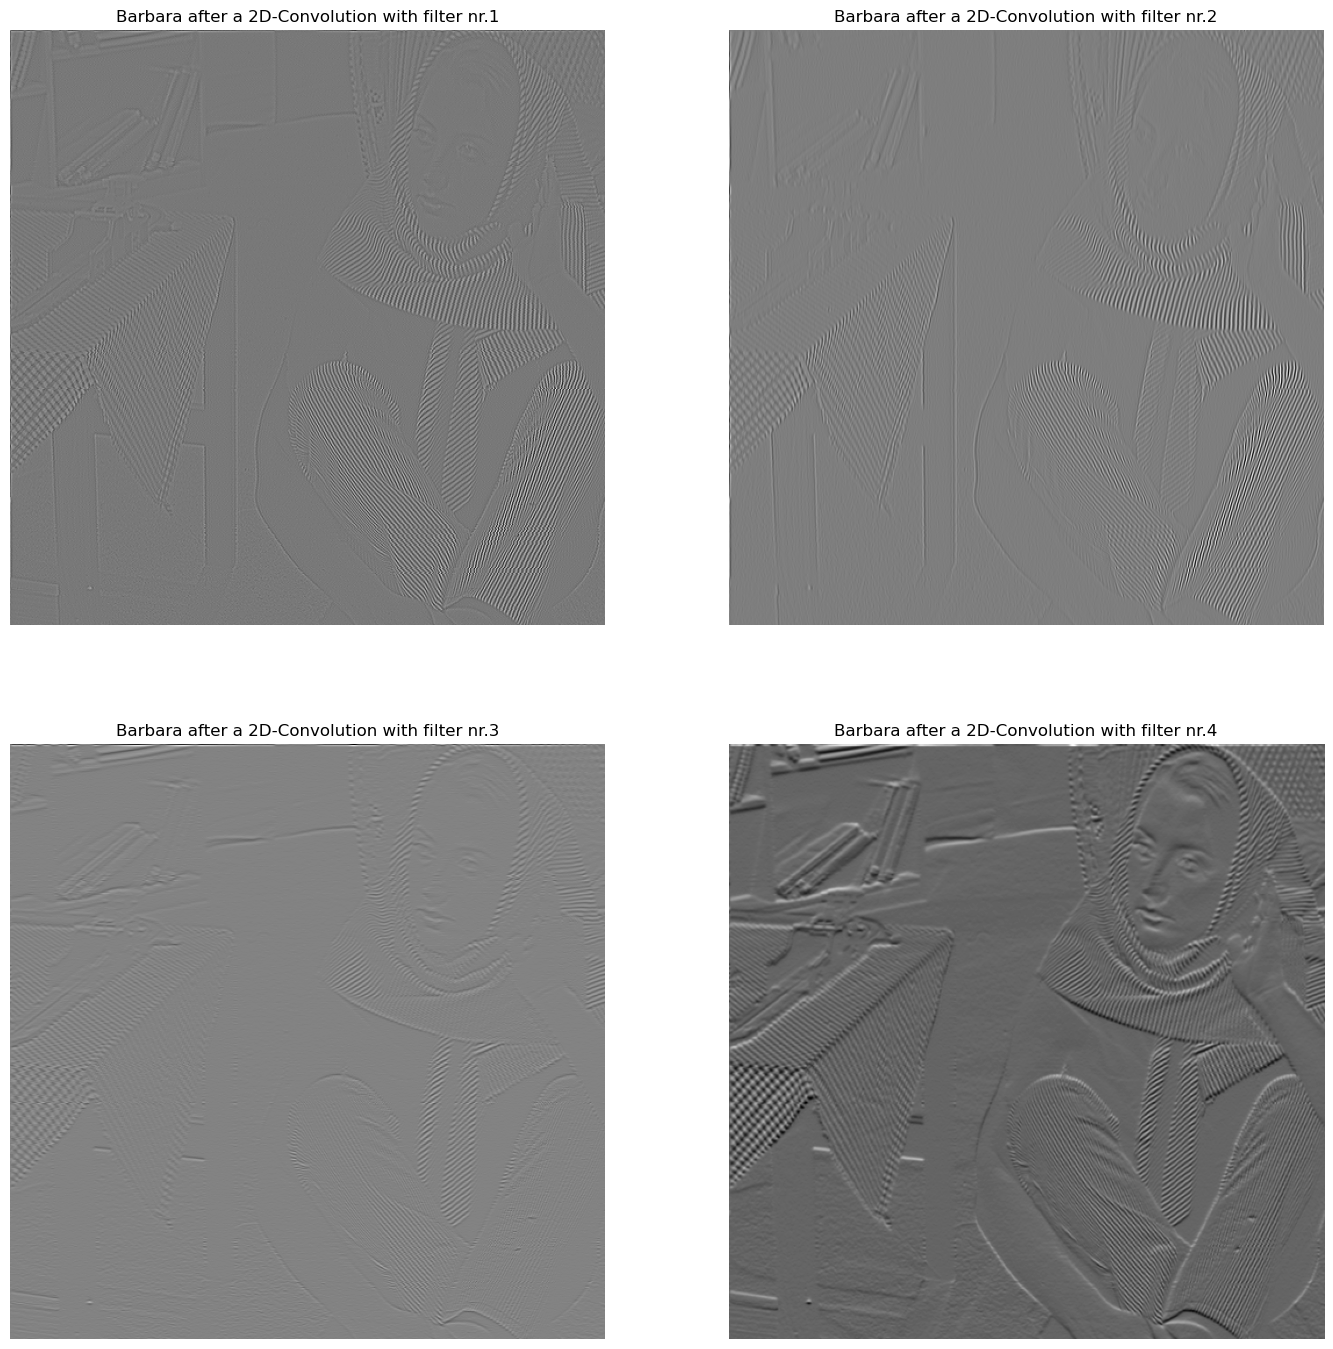

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(17, 17))
#2D convolution with filter nr.1
ax[0,0].imshow(convolution2D_filter1, cmap='gray')
ax[0,0].axis('off')  # Turn off axis numbers
ax[0,0].set_title(r'Barbara after a 2D-Convolution with filter nr.1')

#2D convolution with filter nr.2
ax[0,1].imshow(convolution2D_filter2, cmap='gray')
ax[0,1].axis('off')  # Turn off axis numbers
ax[0,1].set_title(r'Barbara after a 2D-Convolution with filter nr.2')

#2D convolution with filter nr.3
ax[1,0].imshow(convolution2D_filter3, cmap='gray')
ax[1,0].axis('off')  # Turn off axis numbers
ax[1,0].set_title(r'Barbara after a 2D-Convolution with filter nr.3')

#2D convolution with filter nr.4
ax[1,1].imshow(convolution2D_filter4, cmap='gray')
ax[1,1].axis('off')  # Turn off axis numbers
ax[1,1].set_title(r'Barbara after a 2D-Convolution with filter nr.4')
 
plt.show()

The plots above show us the convolutions of `barbara.gif` with filters nr.1 through 4. It seems that, on the contrary of the Dirchlet filter, the more "simpler" filters retain the information about the contrasts from the original picture, such that we get the outlines of the original image with filter nr.4. This shows that the speculations made in 2e), where we discussed that the $h$-filter only shows the major changes in the signal, seem to be correct as only the major changes in `barbara.gif` are registrered by the convolution of the image with the filters 1 through 4. 

**d)** Now, lets consider the image `Yarimton.png`, an image printed using half-toning, meaning that the image is made out small dots printed at a certain distance from each other. These small dots can be seen as pixels with contrast of high frequency on certain parts of the image. To blur these out, we can use a Dirichlet-kernel, which is, as we already know, a low-pass filter that is capable of blurring out high contrasts. 

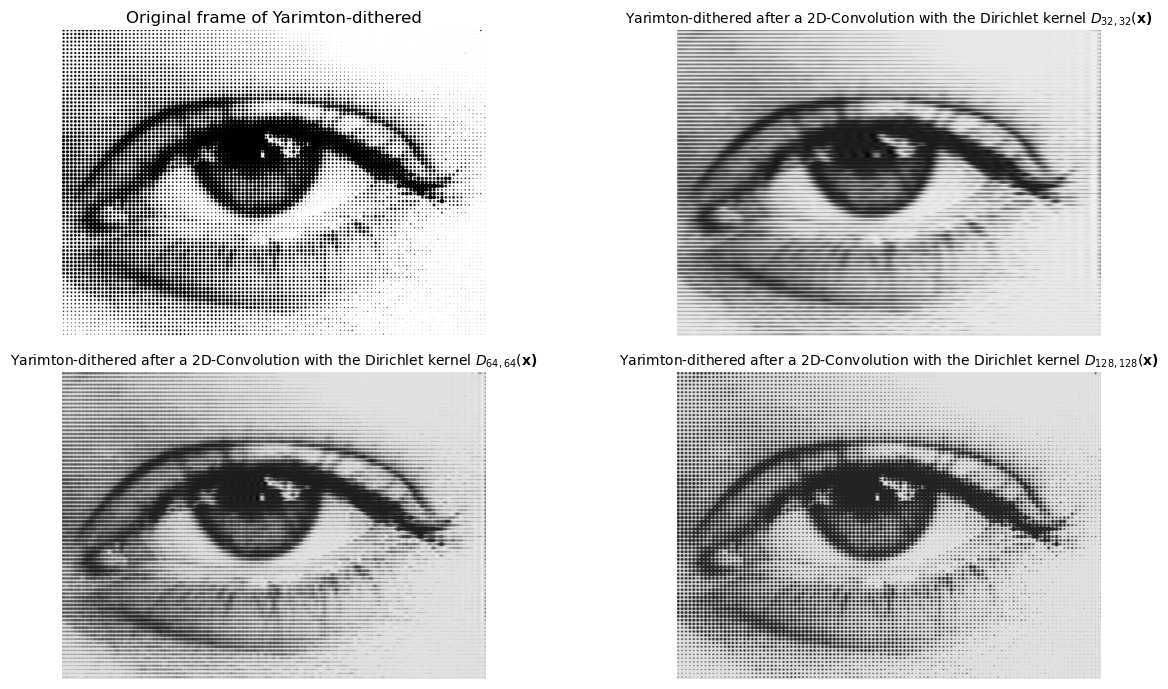

In [18]:
#Loading the PNG image
img_yarimton = imageio.v2.imread('project1-data/Yarimton-dithered.png')
frame_yarimton = np.array(img_yarimton)

#Given constants
N1, N2 = len(frame_yarimton), len(frame_yarimton[0])
x1 = np.linspace(0,1,N1)
x2 = np.linspace(0,1,N2)

n1_array = np.array([32,64,128])
n2_array = np.array([32,64,128])

#Calculating the Dirichlet kernels for different n-values as well as their convolutions with the image
dirichlet2D_1_yarimton = Dirichlet_2D(x1, x2, n1_array[0], n2_array[0])
convolution2D_dirichlet1_yarimton = Convolution_2D(frame_yarimton, dirichlet2D_1_yarimton)

dirichlet2D_2_yarimton = Dirichlet_2D(x1, x2, n1_array[1], n2_array[1])
convolution2D_dirichlet2_yarimton = Convolution_2D(frame_yarimton, dirichlet2D_2_yarimton)

dirichlet2D_3_yarimton = Dirichlet_2D(x1, x2, n1_array[2], n2_array[2])
convolution2D_dirichlet3_yarimton = Convolution_2D(frame_yarimton, dirichlet2D_3_yarimton)


#plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 7))

ax[0,0].imshow(frame_yarimton, cmap='gray')
ax[0,0].axis('off')  # Turn off axis numbers
ax[0,0].set_title(r'Original frame of Yarimton-dithered', fontsize=12)

ax[0,1].imshow(convolution2D_dirichlet1_yarimton, cmap='gray')
ax[0,1].axis('off')  # Turn off axis numbers
ax[0,1].set_title(r'Yarimton-dithered after a 2D-Convolution with the Dirichlet kernel $D_{32,32}(\bf{x})$', 
                  fontsize=10)

ax[1,0].imshow(convolution2D_dirichlet2_yarimton, cmap='gray')
ax[1,0].axis('off')  # Turn off axis numbers
ax[1,0].set_title(r'Yarimton-dithered after a 2D-Convolution with the Dirichlet kernel $D_{64,64}(\bf{x})$', 
                  fontsize=10)

ax[1,1].imshow(convolution2D_dirichlet3_yarimton, cmap='gray')
ax[1,1].axis('off')  # Turn off axis numbers
ax[1,1].set_title(r'Yarimton-dithered after a 2D-Convolution with the Dirichlet kernel $D_{128,128}(\bf{x})$', 
                  fontsize=10)

plt.tight_layout()  
plt.show()

The figure above shows us the result of the convolution with the Dirichlet filter for different number of samples $n \in [32,64,128]$. We can clearly see that the Dirichlet filter works best for $n=32,64$, as the dots appear to have disappeared. The Dirichlet filter for $n=128$ seems to perform worst, even though its resolution is the best one out the three. The reason behind that is that, the higher the amount of samples, the more information the filter contains, and hence its convolution, making the result more accurate to the original picture. In our case the sweet spot seems to be more between $n=32,64$.

We can test this theory on other pictues, such as `munkholmen-dithered.png` and `lighthouse-dithered.png`.

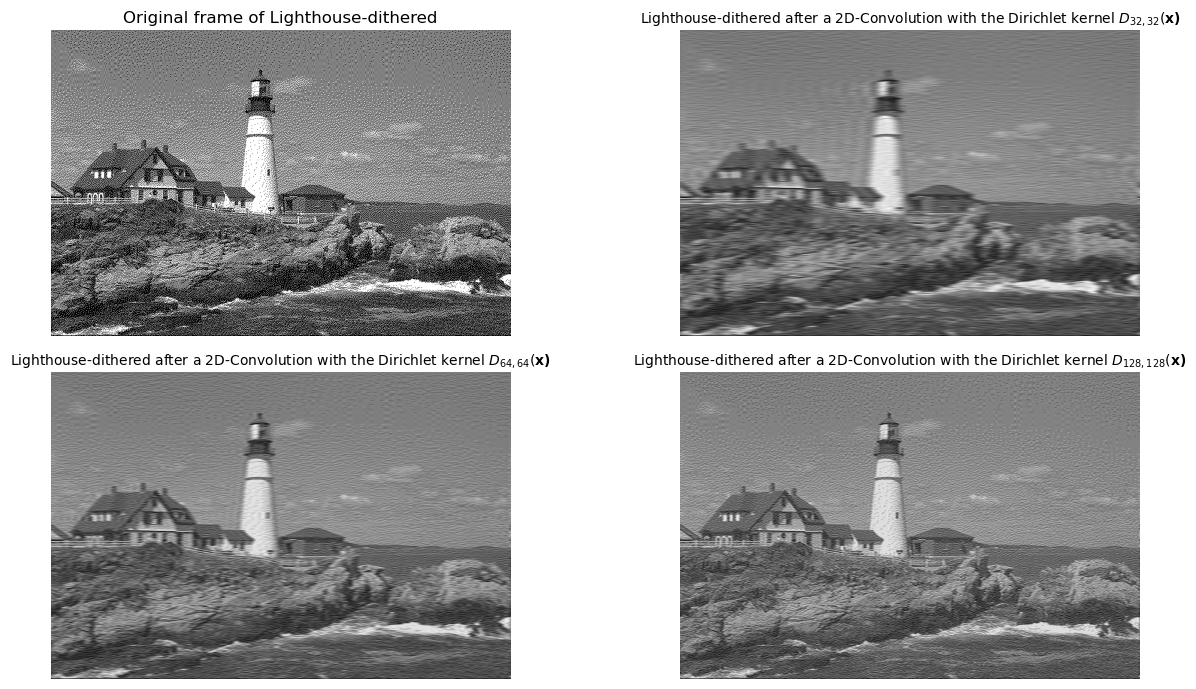

In [19]:
#Loading the PNG image
img_lighthouse = imageio.v2.imread('project1-data/lighthouse-dithered.png')
frame_lighthouse = np.array(img_lighthouse)

N1, N2 = len(frame_lighthouse), len(frame_lighthouse[0])
x1 = np.linspace(0,1,N1)
x2 = np.linspace(0,1,N2)

#Calculating the Dirichlet kernels for different n-values as well as their convolutions with the image
dirichlet2D_1_lighthouse = Dirichlet_2D(x1, x2, n1_array[0], n2_array[0])
convolution2D_dirichlet1_lighthouse = Convolution_2D(frame_lighthouse, dirichlet2D_1_lighthouse)

dirichlet2D_2_lighthouse = Dirichlet_2D(x1, x2, n1_array[1], n2_array[1])
convolution2D_dirichlet2_lighthouse = Convolution_2D(frame_lighthouse, dirichlet2D_2_lighthouse)

dirichlet2D_3_lighthouse = Dirichlet_2D(x1, x2, n1_array[2], n2_array[2])
convolution2D_dirichlet3_lighthouse = Convolution_2D(frame_lighthouse, dirichlet2D_3_lighthouse)

#plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 7))

ax[0,0].imshow(frame_lighthouse, cmap='gray')
ax[0,0].axis('off')  # Turn off axis numbers
ax[0,0].set_title(r'Original frame of Lighthouse-dithered', fontsize=12)

ax[0,1].imshow(convolution2D_dirichlet1_lighthouse, cmap='gray')
ax[0,1].axis('off')  # Turn off axis numbers
ax[0,1].set_title(r'Lighthouse-dithered after a 2D-Convolution with the Dirichlet kernel $D_{32,32}(\bf{x})$', 
                  fontsize=10)

ax[1,0].imshow(convolution2D_dirichlet2_lighthouse, cmap='gray')
ax[1,0].axis('off')  # Turn off axis numbers
ax[1,0].set_title(r'Lighthouse-dithered after a 2D-Convolution with the Dirichlet kernel $D_{64,64}(\bf{x})$', 
                  fontsize=10)

ax[1,1].imshow(convolution2D_dirichlet3_lighthouse, cmap='gray')
ax[1,1].axis('off')  # Turn off axis numbers
ax[1,1].set_title(r'Lighthouse-dithered after a 2D-Convolution with the Dirichlet kernel $D_{128,128}(\bf{x})$', 
                  fontsize=10)

plt.tight_layout()  
plt.show()

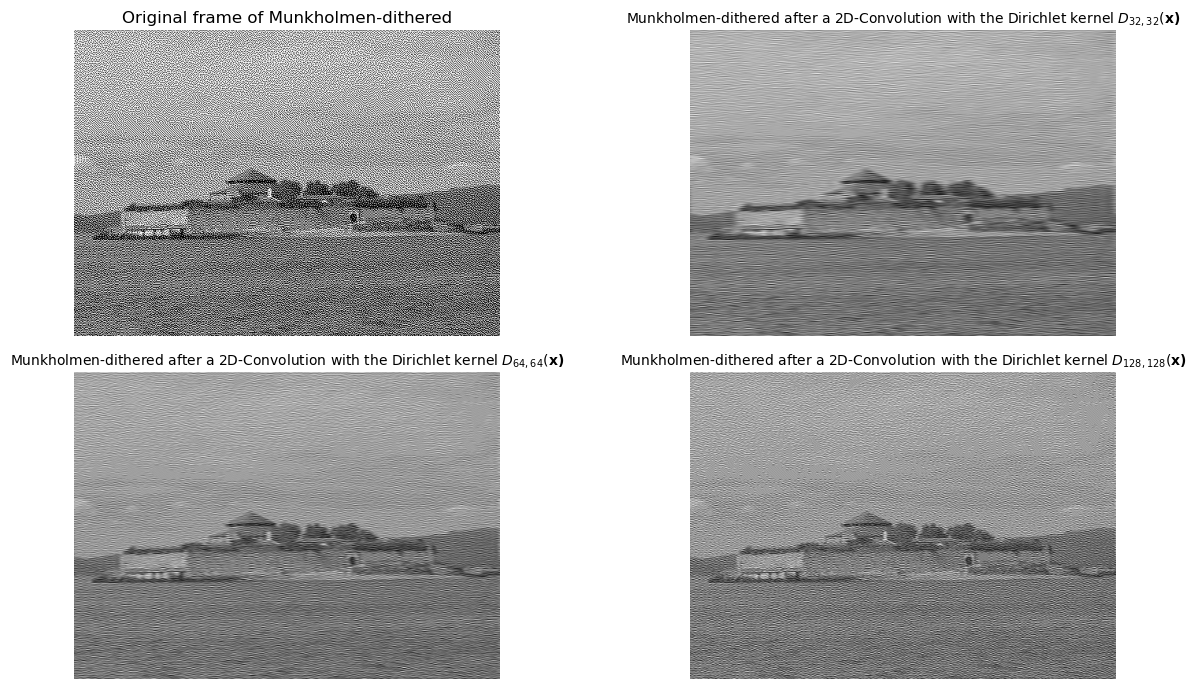

In [20]:
#Loading the PNG image
img_munkholmen = imageio.v2.imread('project1-data/munkholmen-dithered.png')
frame_munkholmen = np.array(img_munkholmen)

N1, N2 = len(frame_munkholmen), len(frame_munkholmen[0])
x1 = np.linspace(0,1,N1)
x2 = np.linspace(0,1,N2)

#Calculating the Dirichlet kernels for different n-values as well as their convolutions with the image
dirichlet2D_1_munkholmen = Dirichlet_2D(x1, x2, n1_array[0], n2_array[0])
convolution2D_dirichlet1_munkholmen = Convolution_2D(frame_munkholmen, dirichlet2D_1_munkholmen)

dirichlet2D_2_munkholmen = Dirichlet_2D(x1, x2, n1_array[1], n2_array[1])
convolution2D_dirichlet2_munkholmen = Convolution_2D(frame_munkholmen, dirichlet2D_2_munkholmen)

dirichlet2D_3_munkholmen = Dirichlet_2D(x1, x2, n1_array[2], n2_array[2])
convolution2D_dirichlet3_munkholmen = Convolution_2D(frame_munkholmen, dirichlet2D_3_munkholmen)

#plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 7))

ax[0,0].imshow(frame_munkholmen, cmap='gray')
ax[0,0].axis('off')  # Turn off axis numbers
ax[0,0].set_title(r'Original frame of Munkholmen-dithered', fontsize=12)

ax[0,1].imshow(convolution2D_dirichlet1_munkholmen, cmap='gray')
ax[0,1].axis('off')  # Turn off axis numbers
ax[0,1].set_title(r'Munkholmen-dithered after a 2D-Convolution with the Dirichlet kernel $D_{32,32}(\bf{x})$', 
                  fontsize=10)

ax[1,0].imshow(convolution2D_dirichlet2_munkholmen, cmap='gray')
ax[1,0].axis('off')  # Turn off axis numbers
ax[1,0].set_title(r'Munkholmen-dithered after a 2D-Convolution with the Dirichlet kernel $D_{64,64}(\bf{x})$', 
                  fontsize=10)

ax[1,1].imshow(convolution2D_dirichlet3_munkholmen, cmap='gray')
ax[1,1].axis('off')  # Turn off axis numbers
ax[1,1].set_title(r'Munkholmen-dithered after a 2D-Convolution with the Dirichlet kernel $D_{128,128}(\bf{x})$', 
                  fontsize=10)

plt.tight_layout()  
plt.show()

As we can see, the filtered images with the best performing filter seem to be the ones that have been filtered with $n_1= n_2 =64$ samples in the Dirichlet filter.

### Conclusion

In this project, we have shown and proven many claims around the Fourier transforms, as well as derived a formula for the Discrete Fourier Transform, which we have used to process both signals and images. We have explored the Dirichlet filter, its properties and its applications, as well as taken a look on other useful filters for signal and image processing. This project has provided me with a better insight on how to use the Discrete, as well as the Fast Fourier Transform on both signals and images. 

However, I would like to emphasize that this project only focused on black-and-white images for instance, making the task easier to handle. To fully implement this project, we would need extend the programme so that it is able to fully reconstruct coloured images. In addition to that, it would also be necessary to implement other filters than the Dirichlet kernel, as it is well-known that the Dirichlet kernel is not as good at approximating as other ones. Furthermore, the Dirichlet kernel is well-know to cause frequency leakage, meaning that it might not adequately separate frequency components due to its non-zero tails in the frequency domain. A full implementation of image processing on coloured images with filters other than the Dirichlet one would have, of course, been difficult due to time reasons. 